# Obtenção dos Dados

In [2]:
!pip install ipeadatapy

In [3]:
import ipeadatapy as ip

In [4]:
series = ip.list_series()
print(series)

                     CODE                                               NAME
0            ABATE_ABPEAV                   Abate - aves - peso das carcaças
1            ABATE_ABPEBV                Abate - bovinos - peso das carcaças
2            ABATE_ABPESU                 Abate - suínos - peso das carcaças
3            ABATE_ABQUAV                          Abate - aves - quantidade
4            ABATE_ABQUBV                       Abate - bovinos - quantidade
...                   ...                                                ...
4652  PNADCT_TXPARTCUF_SI  Taxa de participação - sem instrução ou equiva...
4653           PNAD_IAGRV         Domicílios com insegurança alimentar grave
4654           PNAD_IALEV          Domicílios com insegurança alimentar leve
4655           PNAD_IAMOD      Domicílios com insegurança alimentar moderada
4656           PNAD_SATOT                 Domicílios com segurança alimentar

[4657 rows x 2 columns]


In [5]:
cod = "EIA366_PBRENT366"
eia366 = ip.timeseries(cod)
print(eia366.head(5))

                        CODE                   RAW DATE  DAY  MONTH  YEAR  \
DATE                                                                        
1986-01-04  EIA366_PBRENT366  1986-01-04T00:00:00-02:00    4      1  1986   
1986-01-05  EIA366_PBRENT366  1986-01-05T00:00:00-02:00    5      1  1986   
1986-01-06  EIA366_PBRENT366  1986-01-06T00:00:00-02:00    6      1  1986   
1986-01-07  EIA366_PBRENT366  1986-01-07T00:00:00-02:00    7      1  1986   
1986-01-08  EIA366_PBRENT366  1986-01-08T00:00:00-02:00    8      1  1986   

            VALUE (US$)  
DATE                     
1986-01-04          NaN  
1986-01-05          NaN  
1986-01-06          NaN  
1986-01-07          NaN  
1986-01-08          NaN  


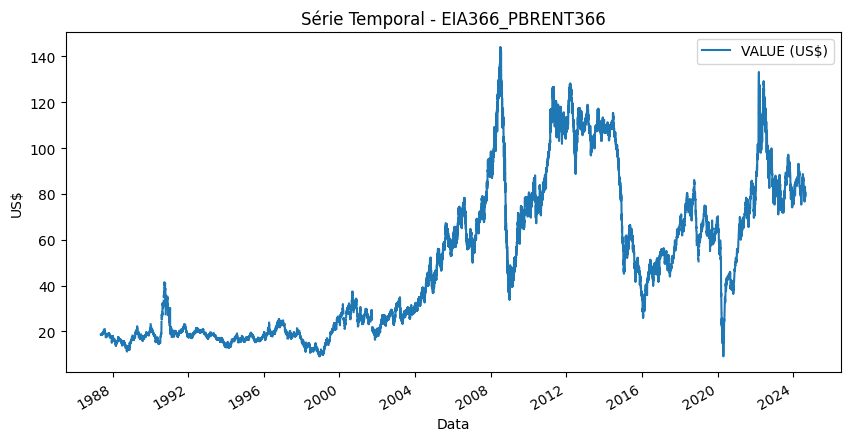

In [6]:
import matplotlib.pyplot as plt

# plota os dados
eia366[["VALUE (US$)"]].plot(figsize=(10, 5))
plt.title("Série Temporal - EIA366_PBRENT366")
plt.xlabel("Data")
plt.ylabel("US$")
plt.show()

In [7]:
eia366[["VALUE (US$)"]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13512 entries, 1986-01-04 to 2024-08-23
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   VALUE (US$)  11242 non-null  float64
dtypes: float64(1)
memory usage: 211.1 KB


# Engenharia de Features

In [8]:
eia366 = eia366[["VALUE (US$)"]]
eia366.rename(columns={"VALUE (US$)": "value_usd"}, inplace=True)
eia366.index.name = "date"
eia366 = eia366.dropna()
print(eia366)

            value_usd
date                 
1987-05-20      18.63
1987-05-21      18.45
1987-05-22      18.55
1987-05-25      18.60
1987-05-26      18.63
...               ...
2024-08-19      81.09
2024-08-20      78.85
2024-08-21      78.77
2024-08-22      78.80
2024-08-23      80.34

[11242 rows x 1 columns]


In [9]:
df = eia366.copy()

In [10]:
df

value_usd
date                 
1987-05-20      18.63
1987-05-21      18.45
1987-05-22      18.55
1987-05-25      18.60
1987-05-26      18.63
...               ...
2024-08-19      81.09
2024-08-20      78.85
2024-08-21      78.77
2024-08-22      78.80
2024-08-23      80.34

[11242 rows x 1 columns]

In [11]:
# lags de 1 a 7 dias do preço
for lag in range(1, 8):
    df[f"lag_{lag}"] = df["value_usd"].shift(lag)

In [12]:
df

value_usd  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7
date                                                                  
1987-05-20      18.63    NaN    NaN    NaN    NaN    NaN    NaN    NaN
1987-05-21      18.45  18.63    NaN    NaN    NaN    NaN    NaN    NaN
1987-05-22      18.55  18.45  18.63    NaN    NaN    NaN    NaN    NaN
1987-05-25      18.60  18.55  18.45  18.63    NaN    NaN    NaN    NaN
1987-05-26      18.63  18.60  18.55  18.45  18.63    NaN    NaN    NaN
...               ...    ...    ...    ...    ...    ...    ...    ...
2024-08-19      81.09  81.56  83.09  82.15  82.51  83.06  81.07  80.76
2024-08-20      78.85  81.09  81.56  83.09  82.15  82.51  83.06  81.07
2024-08-21      78.77  78.85  81.09  81.56  83.09  82.15  82.51  83.06
2024-08-22      78.80  78.77  78.85  81.09  81.56  83.09  82.15  82.51
2024-08-23      80.34  78.80  78.77  78.85  81.09  81.56  83.09  82.15

[11242 rows x 8 columns]

In [13]:
# média móvel de 7 dias do preço
df["rolling_mean_7"] = df["value_usd"].shift(1).rolling(window=7).mean()

In [14]:
df

value_usd  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7  \
date                                                                     
1987-05-20      18.63    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1987-05-21      18.45  18.63    NaN    NaN    NaN    NaN    NaN    NaN   
1987-05-22      18.55  18.45  18.63    NaN    NaN    NaN    NaN    NaN   
1987-05-25      18.60  18.55  18.45  18.63    NaN    NaN    NaN    NaN   
1987-05-26      18.63  18.60  18.55  18.45  18.63    NaN    NaN    NaN   
...               ...    ...    ...    ...    ...    ...    ...    ...   
2024-08-19      81.09  81.56  83.09  82.15  82.51  83.06  81.07  80.76   
2024-08-20      78.85  81.09  81.56  83.09  82.15  82.51  83.06  81.07   
2024-08-21      78.77  78.85  81.09  81.56  83.09  82.15  82.51  83.06   
2024-08-22      78.80  78.77  78.85  81.09  81.56  83.09  82.15  82.51   
2024-08-23      80.34  78.80  78.77  78.85  81.09  81.56  83.09  82.15   

            rolling_mean_7  
date                        
1987-05-20             NaN  
1987-05-21             NaN  
1987-05-22             NaN  
1987-05-25             NaN  
1987-05-26             NaN  
...                    ...  
2024-08-19       82.028571  
2024-08-20       82.075714  
2024-08-21       81.758571  
2024-08-22       81.145714  
2024-08-23       80.615714  

[11242 rows x 9 columns]

In [15]:
# diferenças de preço entre os dias
df["diff"] = df["value_usd"].shift(1).diff()

In [16]:
df[["diff"]]

diff
date            
1987-05-20   NaN
1987-05-21   NaN
1987-05-22 -0.18
1987-05-25  0.10
1987-05-26  0.05
...          ...
2024-08-19 -1.53
2024-08-20 -0.47
2024-08-21 -2.24
2024-08-22 -0.08
2024-08-23  0.03

[11242 rows x 1 columns]

In [17]:
# componentes sazonais
df["month"] = df.index.month
df["day_of_week"] = df.index.dayofweek

In [18]:
df[["month", "day_of_week"]]

month  day_of_week
date                          
1987-05-20      5            2
1987-05-21      5            3
1987-05-22      5            4
1987-05-25      5            0
1987-05-26      5            1
...           ...          ...
2024-08-19      8            0
2024-08-20      8            1
2024-08-21      8            2
2024-08-22      8            3
2024-08-23      8            4

[11242 rows x 2 columns]

In [19]:
# desvio padrão móvel do preço na janela de 7 dias
df["rolling_std_7"] = df["value_usd"].shift(1).rolling(window=7).std()

In [20]:
df[["rolling_std_7"]]

rolling_std_7
date                     
1987-05-20            NaN
1987-05-21            NaN
1987-05-22            NaN
1987-05-25            NaN
1987-05-26            NaN
...                   ...
2024-08-19       0.929577
2024-08-20       0.860307
2024-08-21       1.479329
2024-08-22       1.719456
2024-08-23       1.798795

[11242 rows x 1 columns]

In [21]:
# variáveis de calendário
df["day"] = df.index.day
df["quarter"] = df.index.quarter
df["year"] = df.index.year

In [22]:
df[["day", "quarter", "year"]]

day  quarter  year
date                          
1987-05-20   20        2  1987
1987-05-21   21        2  1987
1987-05-22   22        2  1987
1987-05-25   25        2  1987
1987-05-26   26        2  1987
...         ...      ...   ...
2024-08-19   19        3  2024
2024-08-20   20        3  2024
2024-08-21   21        3  2024
2024-08-22   22        3  2024
2024-08-23   23        3  2024

[11242 rows x 3 columns]

In [23]:
df = df.dropna()

In [24]:
print(df.head())

            value_usd  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7  \
date                                                                     
1987-05-29      18.58  18.60  18.60  18.63  18.60  18.55  18.45  18.63   
1987-06-01      18.65  18.58  18.60  18.60  18.63  18.60  18.55  18.45   
1987-06-02      18.68  18.65  18.58  18.60  18.60  18.63  18.60  18.55   
1987-06-03      18.75  18.68  18.65  18.58  18.60  18.60  18.63  18.60   
1987-06-04      18.78  18.75  18.68  18.65  18.58  18.60  18.60  18.63   

            rolling_mean_7  diff  month  day_of_week  rolling_std_7  day  \
date                                                                       
1987-05-29       18.580000  0.00      5            4       0.063246   29   
1987-06-01       18.572857 -0.02      6            0       0.059362    1   
1987-06-02       18.601429  0.07      6            1       0.032367    2   
1987-06-03       18.620000  0.03      6            2       0.035119    3   
1987-06-04       18.64142

In [25]:
df

value_usd  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7  \
date                                                                     
1987-05-29      18.58  18.60  18.60  18.63  18.60  18.55  18.45  18.63   
1987-06-01      18.65  18.58  18.60  18.60  18.63  18.60  18.55  18.45   
1987-06-02      18.68  18.65  18.58  18.60  18.60  18.63  18.60  18.55   
1987-06-03      18.75  18.68  18.65  18.58  18.60  18.60  18.63  18.60   
1987-06-04      18.78  18.75  18.68  18.65  18.58  18.60  18.60  18.63   
...               ...    ...    ...    ...    ...    ...    ...    ...   
2024-08-19      81.09  81.56  83.09  82.15  82.51  83.06  81.07  80.76   
2024-08-20      78.85  81.09  81.56  83.09  82.15  82.51  83.06  81.07   
2024-08-21      78.77  78.85  81.09  81.56  83.09  82.15  82.51  83.06   
2024-08-22      78.80  78.77  78.85  81.09  81.56  83.09  82.15  82.51   
2024-08-23      80.34  78.80  78.77  78.85  81.09  81.56  83.09  82.15   

            rolling_mean_7  diff  month  day_of_week  rolling_std_7  day  \
date                                                                       
1987-05-29       18.580000  0.00      5            4       0.063246   29   
1987-06-01       18.572857 -0.02      6            0       0.059362    1   
1987-06-02       18.601429  0.07      6            1       0.032367    2   
1987-06-03       18.620000  0.03      6            2       0.035119    3   
1987-06-04       18.641429  0.07      6            3       0.058716    4   
...                    ...   ...    ...          ...            ...  ...   
2024-08-19       82.028571 -1.53      8            0       0.929577   19   
2024-08-20       82.075714 -0.47      8            1       0.860307   20   
2024-08-21       81.758571 -2.24      8            2       1.479329   21   
2024-08-22       81.145714 -0.08      8            3       1.719456   22   
2024-08-23       80.615714  0.03      8            4       1.798795   23   

            quarter  year  
date                       
1987-05-29        2  1987  
1987-06-01        2  1987  
1987-06-02        2  1987  
1987-06-03        2  1987  
1987-06-04        2  1987  
...             ...   ...  
2024-08-19        3  2024  
2024-08-20        3  2024  
2024-08-21        3  2024  
2024-08-22        3  2024  
2024-08-23        3  2024  

[11235 rows x 16 columns]

# Treino do modelo de ML D+1

In [26]:
# divisão manual dos dados de treino e teste
train_size = int(len(eia366) * 0.7)
train, test = eia366.iloc[:train_size], eia366.iloc[train_size:]

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# classe customizada para engenharia de features
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self, target, lags, window_size):
        self.target = target
        self.lags = lags
        self.window_size = window_size

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for lag in range(1, self.lags + 1):
            X[f"lag_{lag}"] = X[self.target].shift(lag)
        X[f"rolling_mean_{self.window_size}"] = X[self.target].shift(1).rolling(window=self.window_size).mean()
        X["diff"] = X[self.target].shift(1).diff()
        X["month"] = X.index.month
        X["day_of_week"] = X.index.dayofweek
        X[f"rolling_std_{self.window_size}"] = X[self.target].shift(1).rolling(window=self.window_size).std()
        X["day"] = X.index.day
        X["quarter"] = X.index.quarter
        X["year"] = X.index.year
        X = X.drop(columns=self.target)
        X.fillna(0, inplace=True)
        return X

# pipeline de steps
pipeline = Pipeline([
    ("feature_engineering", FeatureEngineer(target="value_usd", lags=7, window_size=7)),
    ("scaler", StandardScaler()),
    ("model", GradientBoostingRegressor())
])

# espaço amostral de hiperparâmetros
param_grid = {
    "model__n_estimators": [100, 200],
    "model__learning_rate": [0.05, 0.1]
}

# TimeSeriesSplit para validação cruzada
tscv = TimeSeriesSplit(n_splits=3)

# HalvingGridSearchCV para busca de melhor combinação de hiperparâmetros
search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=tscv,
    factor=3,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1
)

X_train = train.copy()  # inclui a coluna 'value_usd' no X para uso no pipeline de feature engineering
y_train = train["value_usd"]

# fit do modelo
search.fit(X_train, y_train)

# melhores hiperparâmetros e score
print("Best parameters found: ", search.best_params_)
print("Best score: ", search.best_score_)


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 2623
max_resources_: 7869
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 2623
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 7869
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters found:  {'model__learning_rate': 0.1, 'model__n_estimators': 100}
Best score:  -592.4408993786652


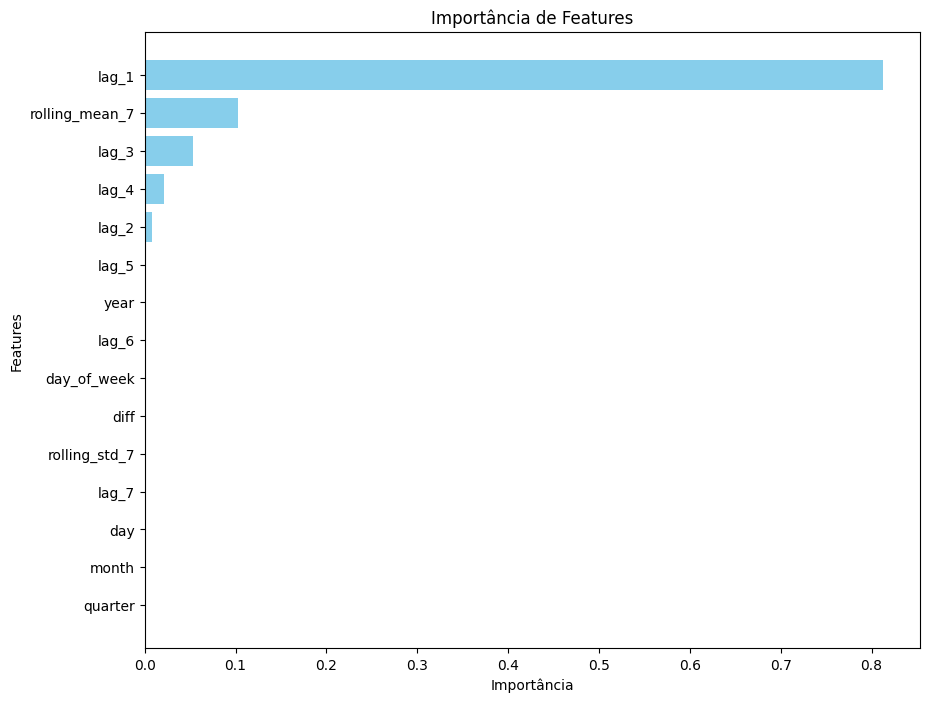

In [28]:
import pandas as pd

# acessando o melhor modelo encontrado
best_model = search.best_estimator_

# extraindo o transformador de engenharia de features
feature_engineering = best_model.named_steps["feature_engineering"]

# transformando X para obter o nome das features geradas
X_transformed = feature_engineering.transform(X_train)
feature_names = X_transformed.columns

# acessando as importâncias das features
importances = best_model.named_steps["model"].feature_importances_

# DataFrame para as importâncias das features
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# plotando o gráfico de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importância")
plt.ylabel("Features")
plt.title("Importância de Features")
plt.gca().invert_yaxis()  # Inverte o eixo y para a feature mais importante aparecer no topo
plt.show()

# Avaliação de Performance D+1


In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error, 
    r2_score
)

# extraindo as features e o target
X_test = test.copy()
y_test = test["value_usd"]

# previsões no conjunto de teste
y_pred = search.predict(X_test)

# avaliação da performance
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("R² Score:", r2)

Mean Absolute Error: 1.3262436039991734
Mean Absolute Percentage Error: 0.022535480645252574
R² Score: 0.9886559010528885


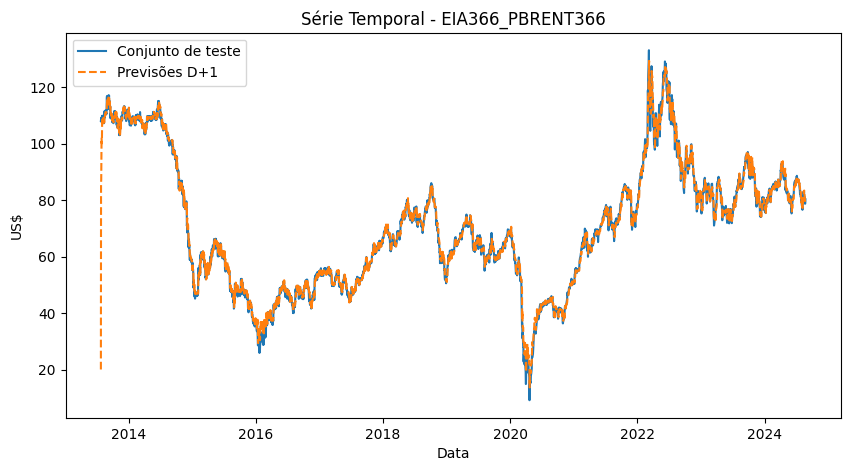

In [30]:
# plot das previsões vs valores reais
plt.figure(figsize=(10, 5))
plt.title("Série Temporal - EIA366_PBRENT366")
plt.plot(y_test.index, y_test, label="Conjunto de teste")
plt.plot(y_test.index, y_pred, label="Previsões D+1", linestyle='--')
plt.xlabel("Data")
plt.ylabel("US$")
plt.legend()
plt.show()

# Treino do modelo de ML D+15

In [31]:
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# classe customizada para engenharia de features
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self, target, lags, window_size):
        self.target = target
        self.lags = lags
        self.window_size = window_size

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for lag in range(0, self.lags):
            X[f"lag_{lag+1}"] = X[self.target].shift(lag)
        X[f"rolling_mean_{self.window_size}"] = X[self.target].rolling(window=self.window_size).mean()
        X["diff"] = X[self.target].diff()
        X["month"] = X.index.month
        X["day_of_week"] = X.index.dayofweek
        X[f"rolling_std_{self.window_size}"] = X[self.target].rolling(window=self.window_size).std()
        X["day"] = X.index.day
        X["quarter"] = X.index.quarter
        X["year"] = X.index.year
        X = X.drop(columns=[self.target])
        X.fillna(0, inplace=True)
        return X

# pipeline de steps
pipeline = Pipeline([
    ("feature_engineering", FeatureEngineer(target="value_usd", lags=15, window_size=15)),
    ("scaler", StandardScaler()),
    ("model", RegressorChain(base_estimator=GradientBoostingRegressor()))
])

# espaço amostral de hiperparâmetros
param_grid = {
    "model__base_estimator__n_estimators": [100, 200],
    "model__base_estimator__learning_rate": [0.05, 0.1],
}

# TimeSeriesSplit para validação cruzada
tscv = TimeSeriesSplit(n_splits=3)

# HalvingGridSearchCV para busca de melhor combinação de hiperparâmetros
search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=tscv,
    factor=3,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1,
    random_state=123
)

X_train = train.copy()  # inclui a coluna 'value_usd' no X para uso no pipeline de feature engineering
y_train = pd.concat([train["value_usd"].shift(-i) for i in range(0, 15)], axis=1).dropna()  # criando as colunas para previsão de D+15
y_train.columns = [f"value_usd_t{i+1}" for i in range(0, 15)]
X_train = X_train.iloc[:len(y_train)]  # alinhando X e y

# fit do modelo
search.fit(X_train, y_train)

# melhores hiperparâmetros e score
print("Best parameters found: ", search.best_params_)
print("Best score: ", search.best_score_)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 2618
max_resources_: 7855
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 2618
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 7854
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters found:  {'model__base_estimator__learning_rate': 0.05, 'model__base_estimator__n_estimators': 200}
Best score:  -302.31763375211057


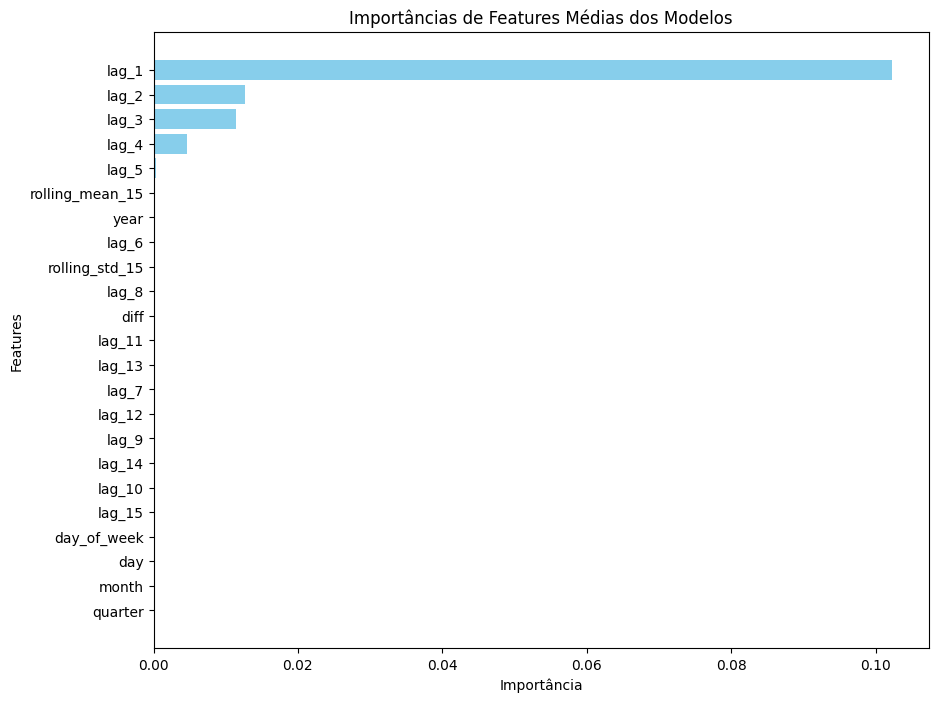

In [32]:
import numpy as np

# melhor modelo
best_pipeline = search.best_estimator_
best_regressor_chain = best_pipeline.named_steps["model"]

# extraindo o transformador de engenharia de features
feature_engineering = best_pipeline.named_steps["feature_engineering"]

# transformando X para obter as features geradas
X_transformed = feature_engineering.transform(X_train)
feature_names = X_transformed.columns

# inicializando a matriz para armazenar as importâncias das features
num_original_features = X_transformed.shape[1]
feature_importances = np.zeros(num_original_features)

# extraindo a importância de features de cada regressor na cadeia
for estimator in best_regressor_chain.estimators_:
    importances = estimator.feature_importances_[:num_original_features]
    feature_importances[:len(importances)] += importances

# normalizando as importâncias das features
feature_importances /= len(best_regressor_chain.estimators_)

# DataFrame para as importâncias das features
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# plotando o gráfico de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importância")
plt.ylabel("Features")
plt.title("Importâncias de Features Médias dos Modelos")
plt.gca().invert_yaxis()  # Inverte o eixo y para a feature mais importante aparecer no topo
plt.show()

# Avaliação de Performance D+15

In [33]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error, 
    r2_score
)

# extraindo as features e o target
X_test = test.copy()
y_test = pd.concat([test["value_usd"].shift(-i) for i in range(1, 16)], axis=1).dropna()
y_test.columns = [f"value_usd_t{i}" for i in range(1, 16)]
X_test = X_test.iloc[:len(y_test)]  # alinhando X_test e y_test

# previsões no conjunto de teste
y_pred = search.predict(X_test)

# avaliação da performance
mae = mean_absolute_error(y_test, y_pred, multioutput="raw_values")
mape = mean_absolute_percentage_error(y_test, y_pred, multioutput="raw_values")
r2 = r2_score(y_test, y_pred, multioutput="raw_values")

print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("R² Score:", r2)

Mean Absolute Error: [1.11681877 1.60540217 1.9363723  2.21002084 2.46302227 2.73172094
 2.93234375 3.1177153  3.28152319 3.460991   3.61310723 3.78944145
 3.9384878  4.09717496 4.24686119]
Mean Absolute Percentage Error: [0.01792561 0.02616428 0.03232734 0.03833703 0.04280942 0.04748609
 0.05095778 0.05462298 0.05723433 0.06028915 0.06279516 0.06591661
 0.06852426 0.07118579 0.07399419]
R² Score: [0.99517143 0.98941478 0.98411256 0.97940404 0.97503142 0.97024581
 0.96661441 0.96264535 0.95937547 0.95555064 0.95232169 0.94769535
 0.94427472 0.94013907 0.93507646]


In [34]:
pd.DataFrame({
    "Previsão": [f"D+{i}" for i in range(1, 16)],
    "Mean Absolute Error": mae,
    "Mean Absolute Percentage Error": mape,
    "R² Score": r2
})

Previsão  Mean Absolute Error  Mean Absolute Percentage Error  R² Score
0       D+1             1.116819                        0.017926  0.995171
1       D+2             1.605402                        0.026164  0.989415
2       D+3             1.936372                        0.032327  0.984113
3       D+4             2.210021                        0.038337  0.979404
4       D+5             2.463022                        0.042809  0.975031
5       D+6             2.731721                        0.047486  0.970246
6       D+7             2.932344                        0.050958  0.966614
7       D+8             3.117715                        0.054623  0.962645
8       D+9             3.281523                        0.057234  0.959375
9      D+10             3.460991                        0.060289  0.955551
10     D+11             3.613107                        0.062795  0.952322
11     D+12             3.789441                        0.065917  0.947695
12     D+13             3.938488                        0.068524  0.944275
13     D+14             4.097175                        0.071186  0.940139
14     D+15             4.246861                        0.073994  0.935076

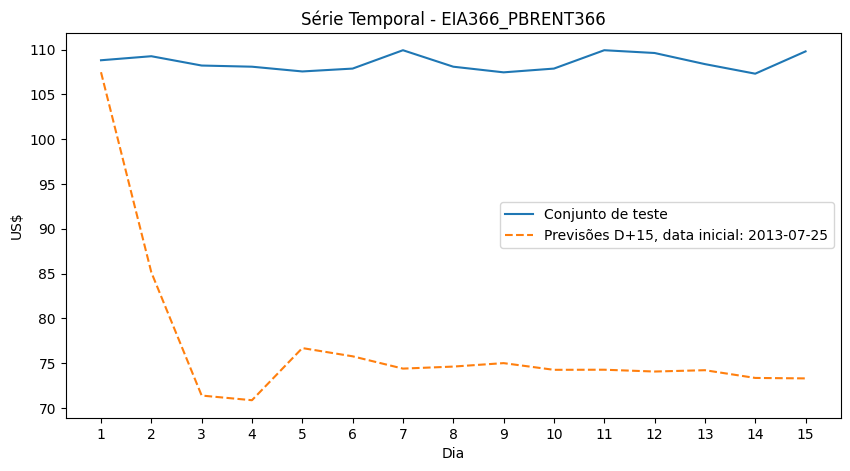

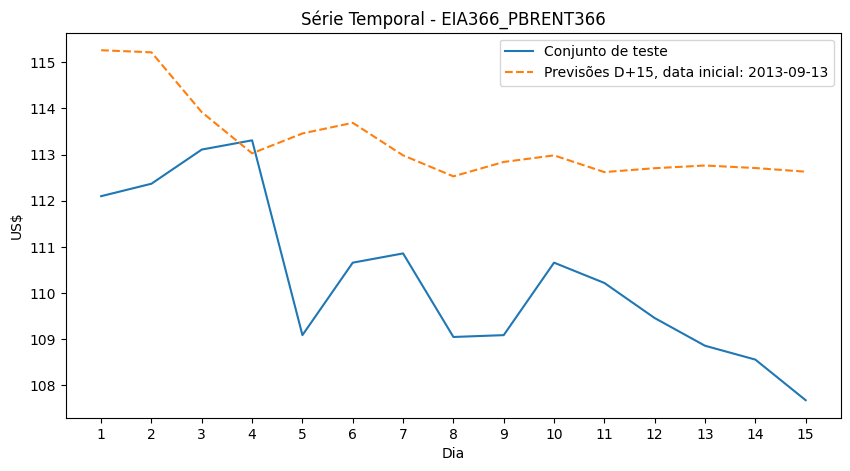

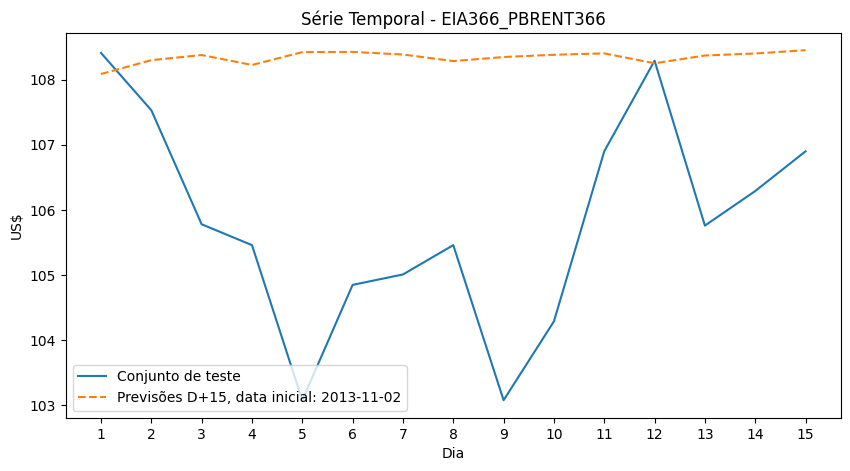

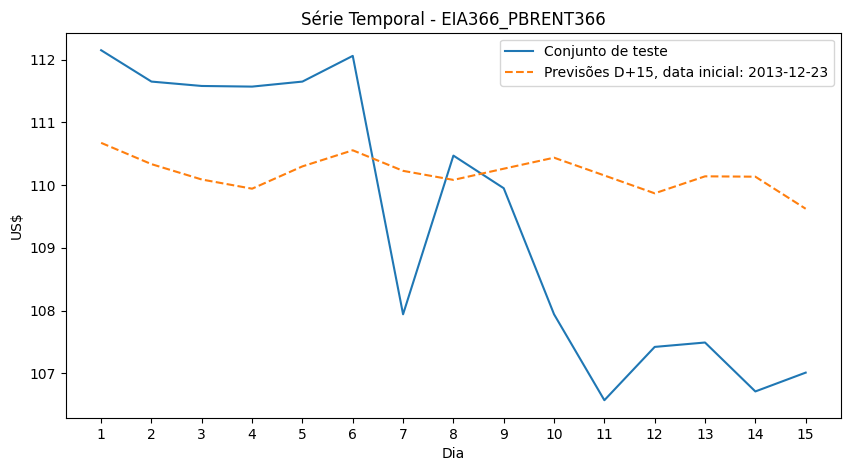

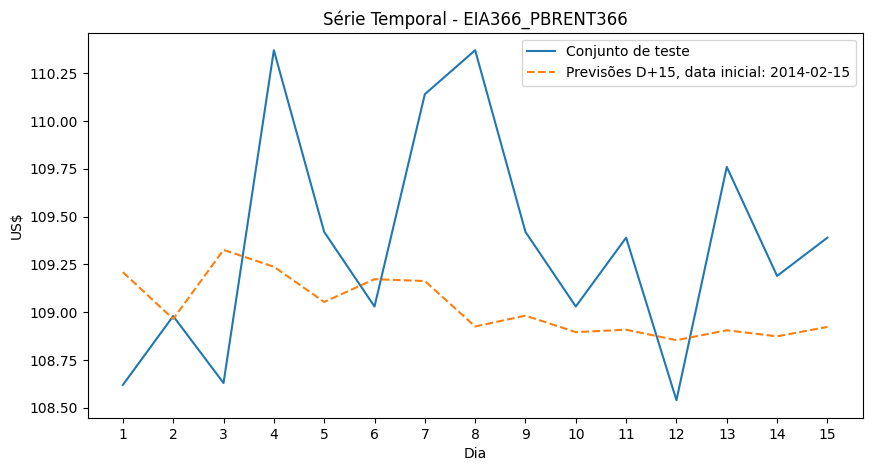

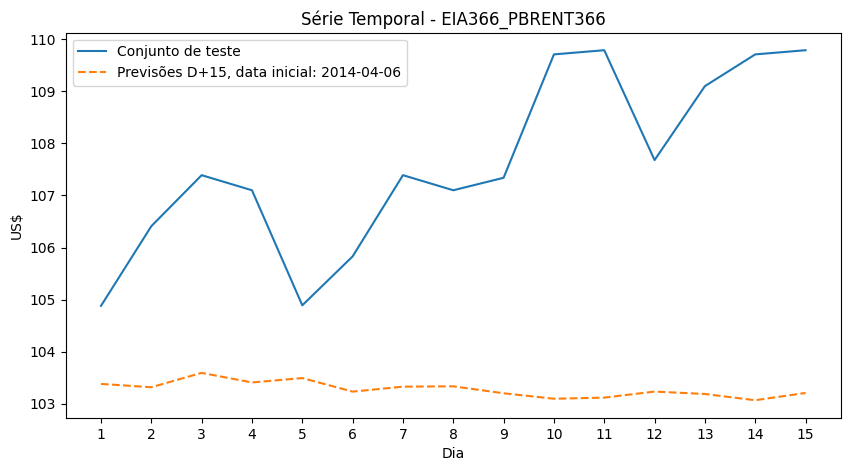

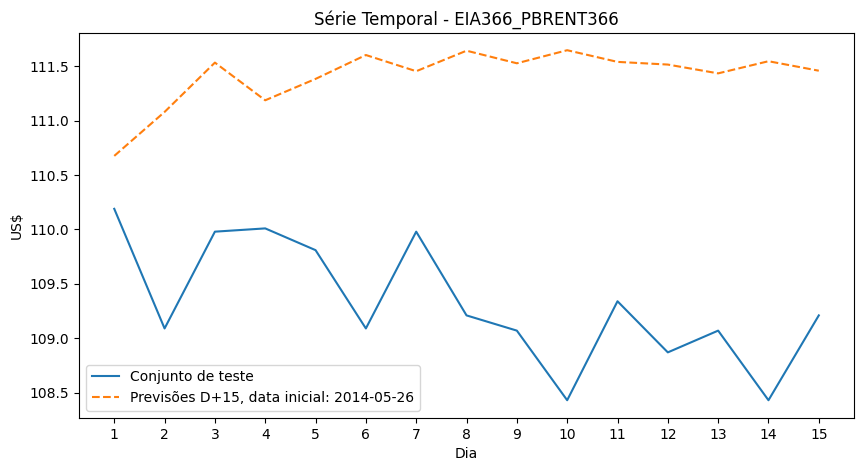

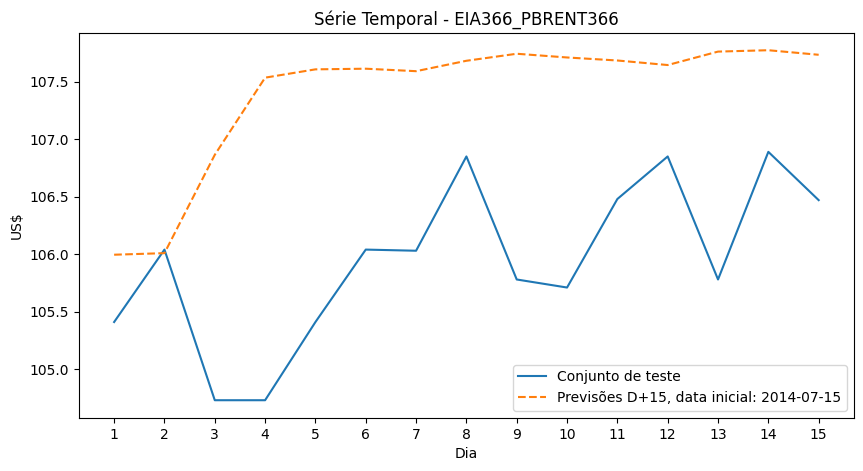

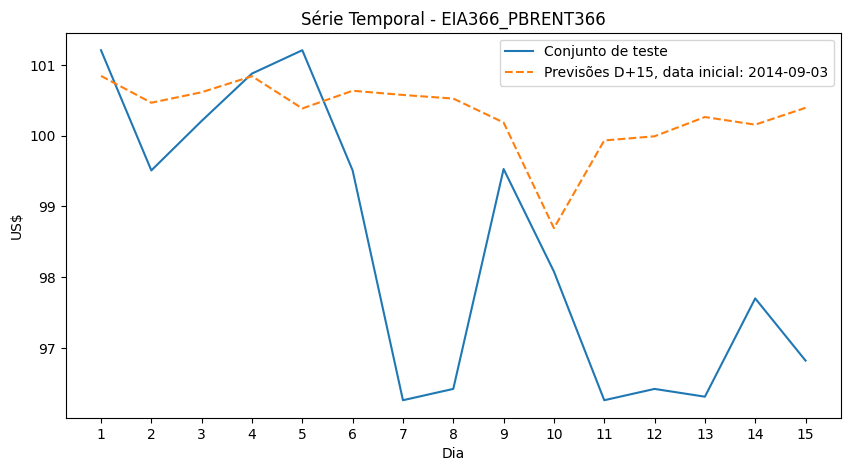

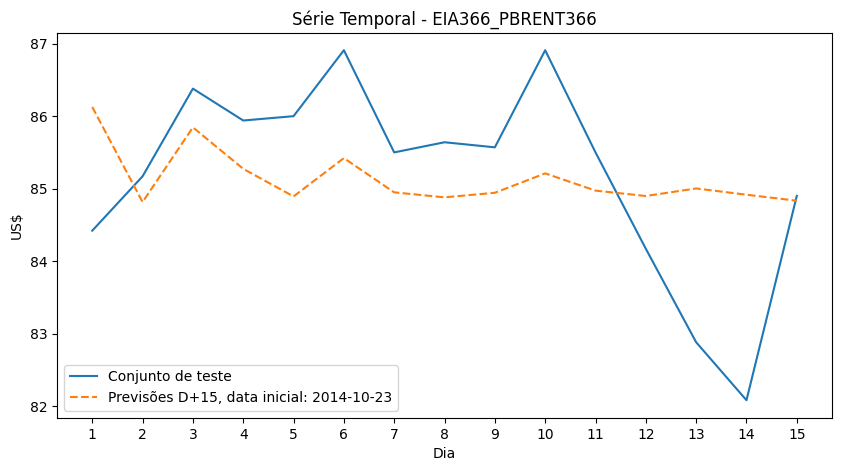

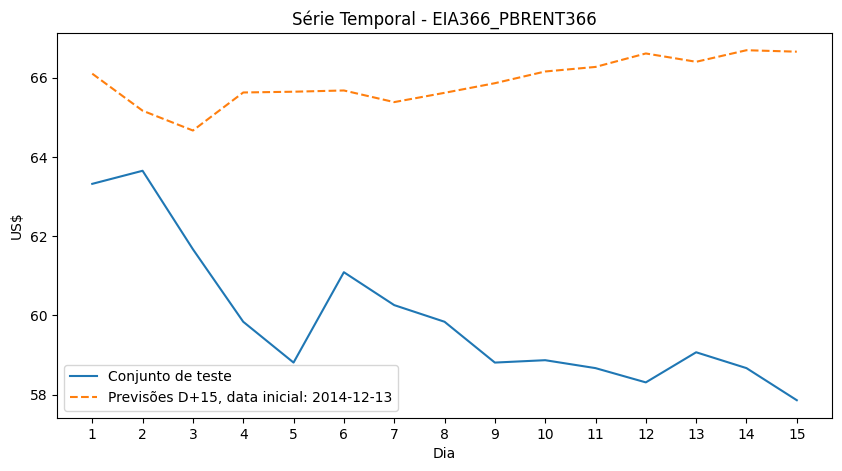

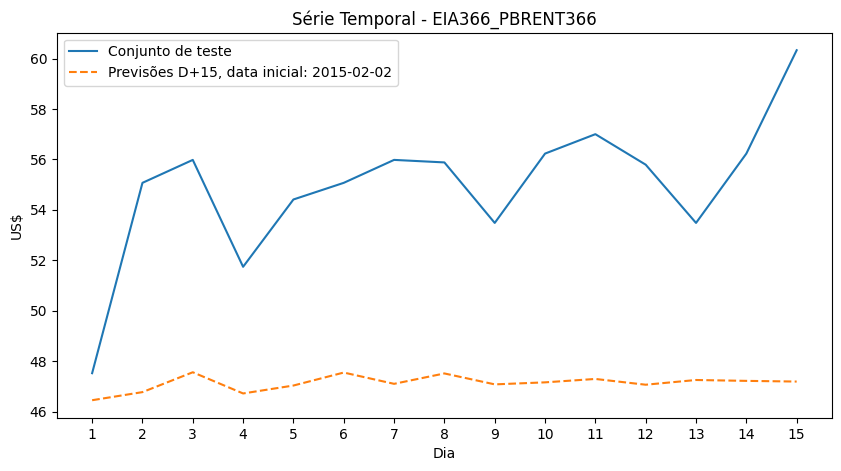

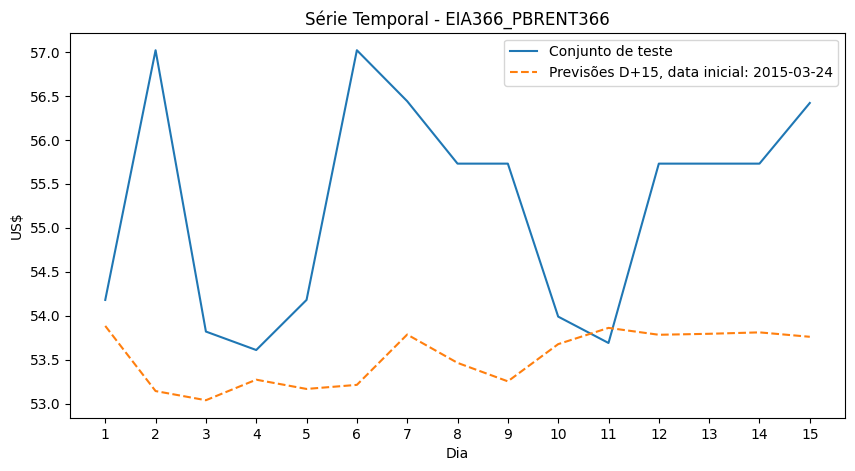

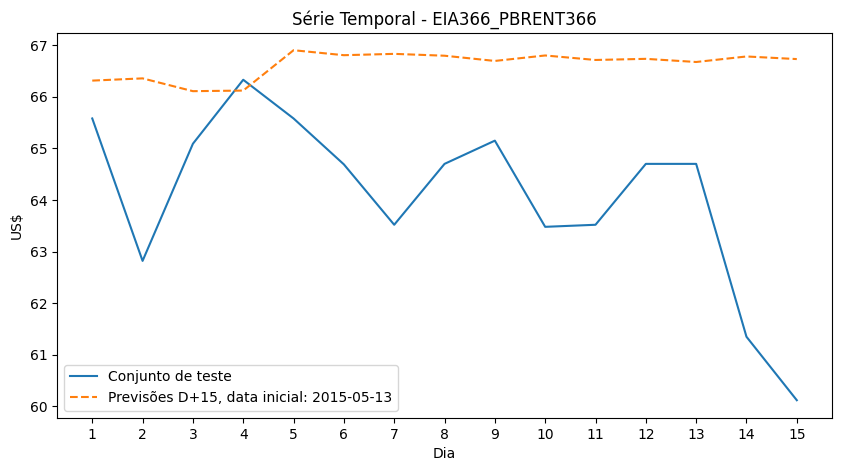

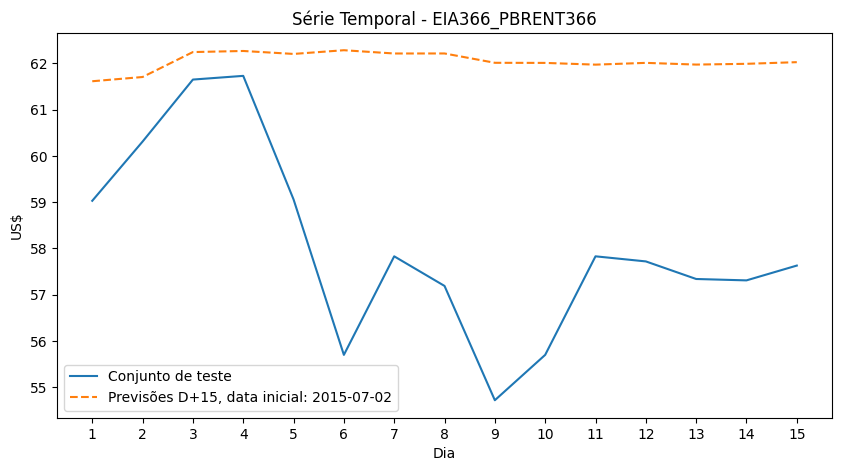

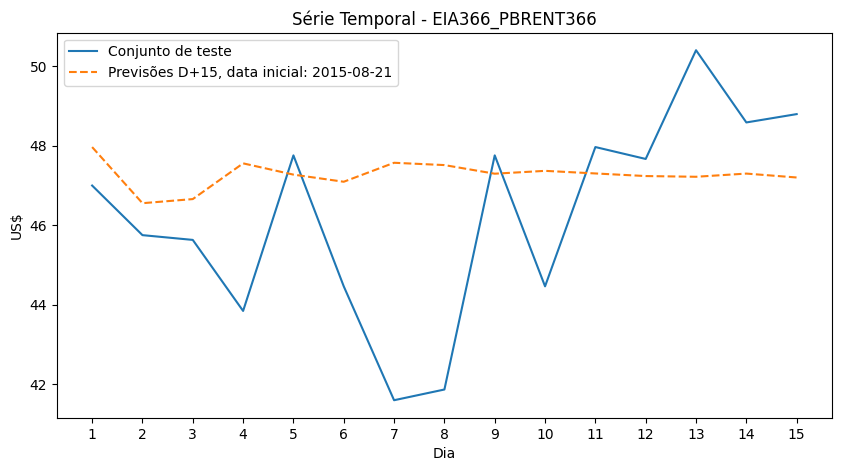

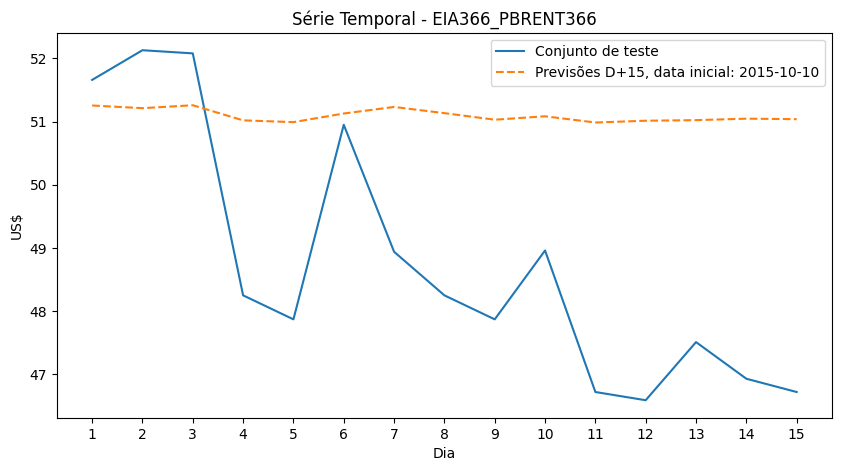

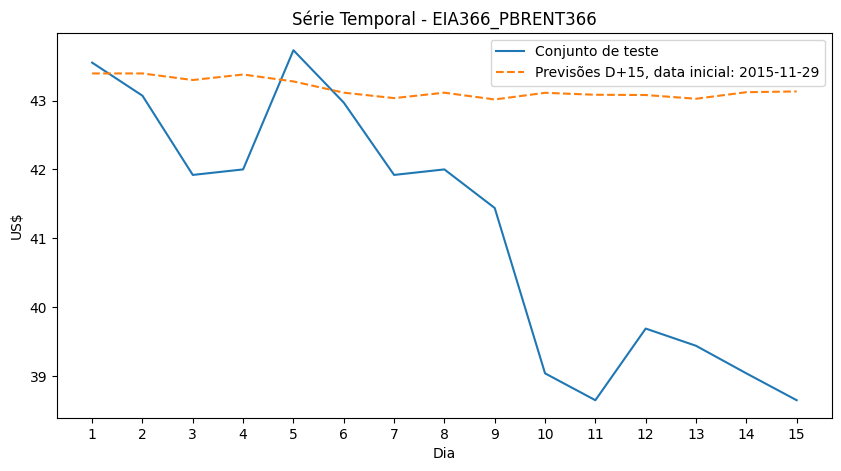

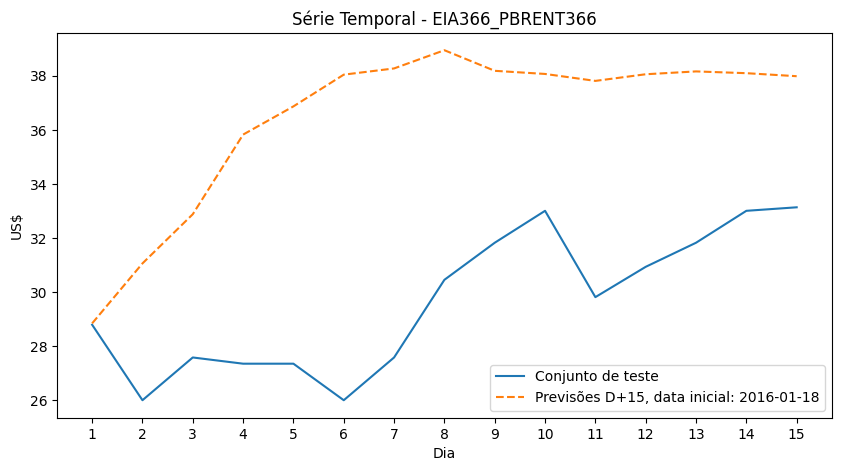

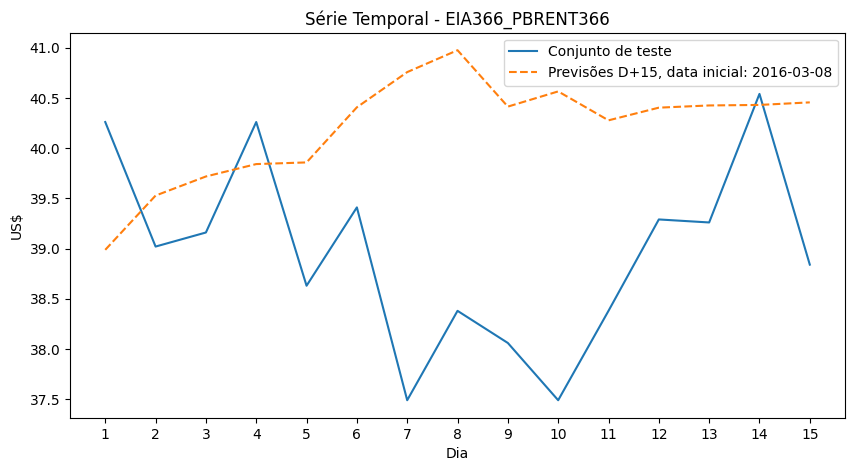

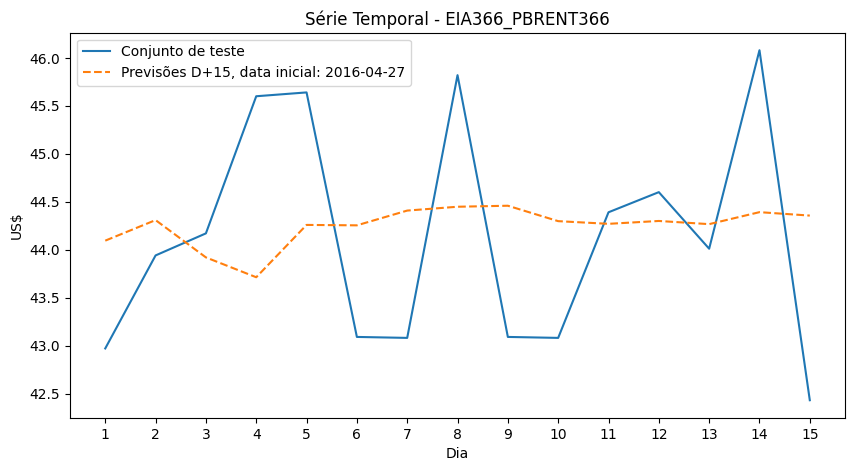

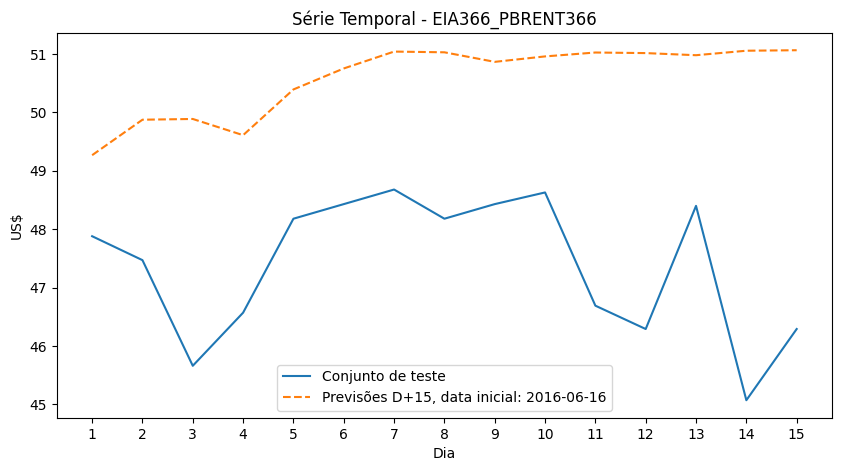

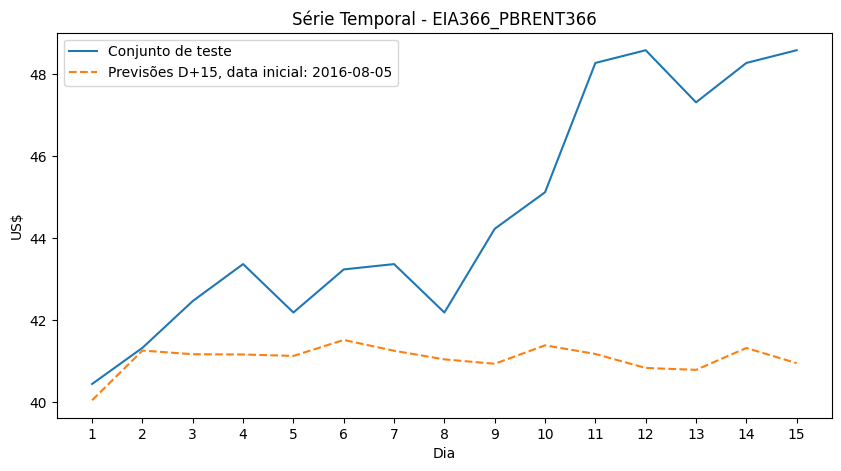

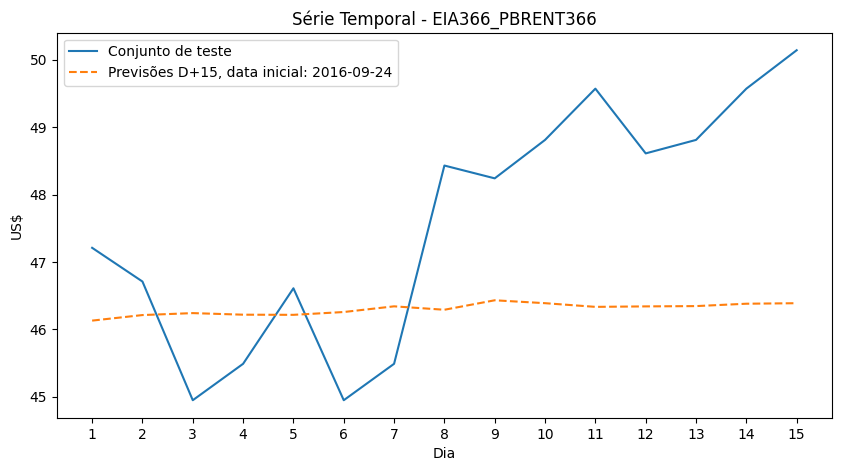

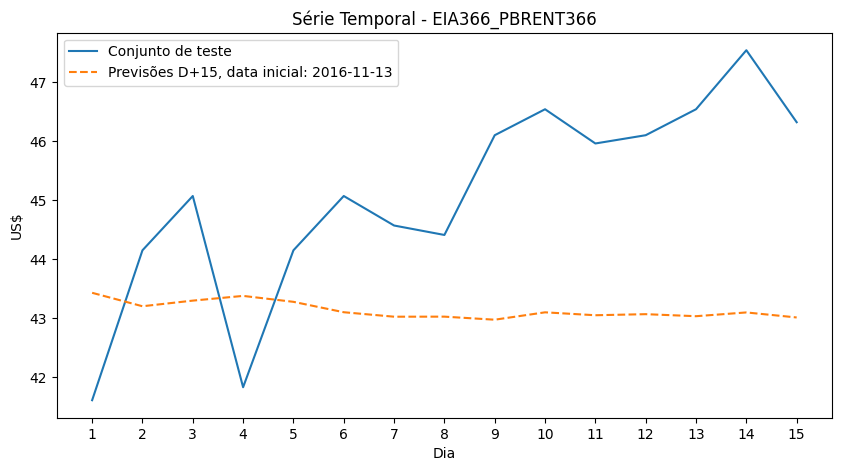

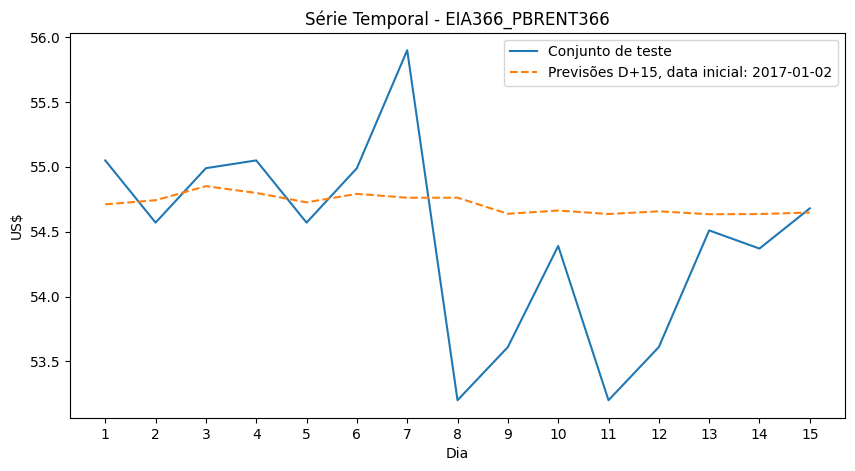

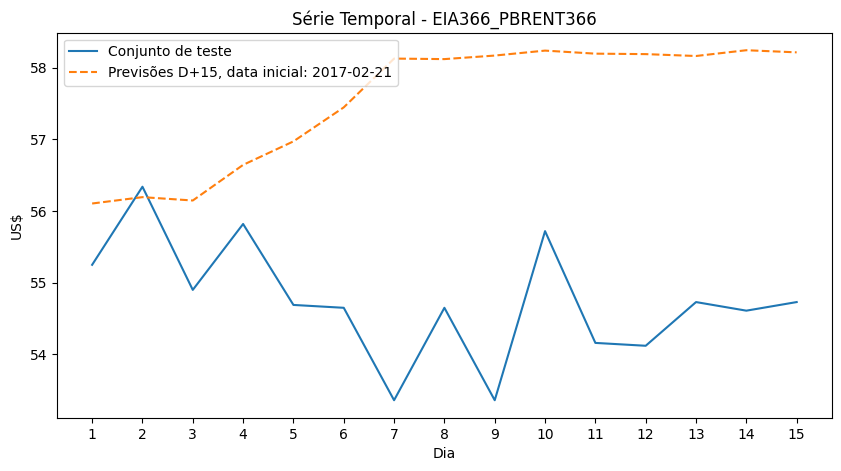

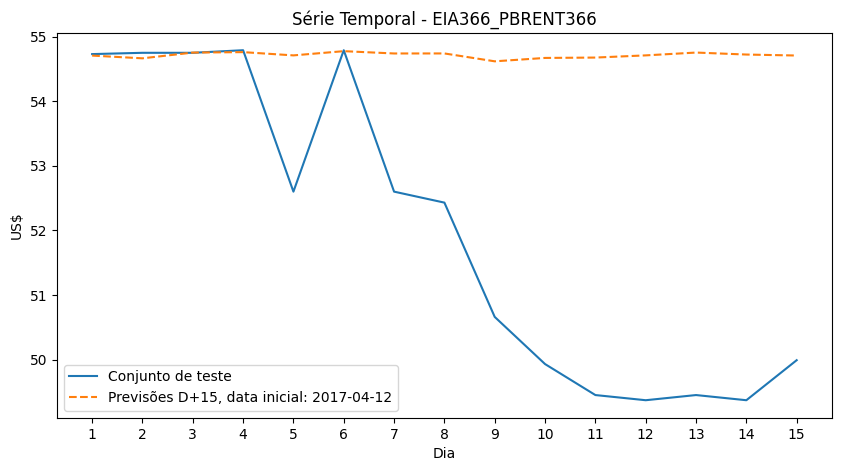

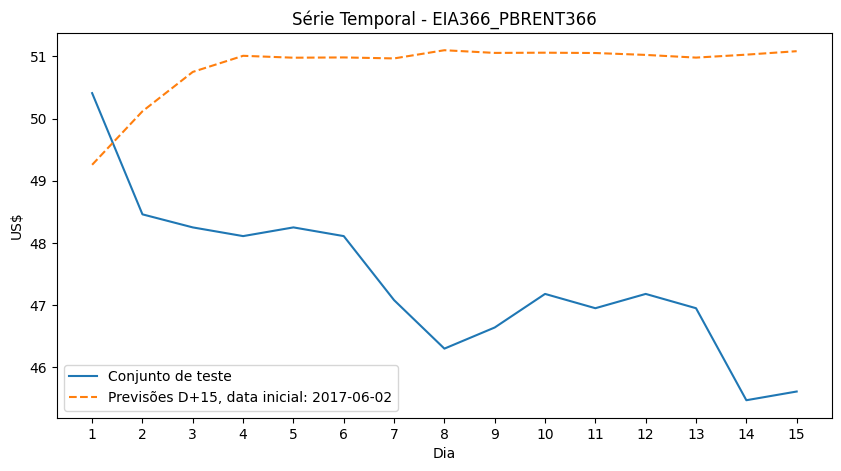

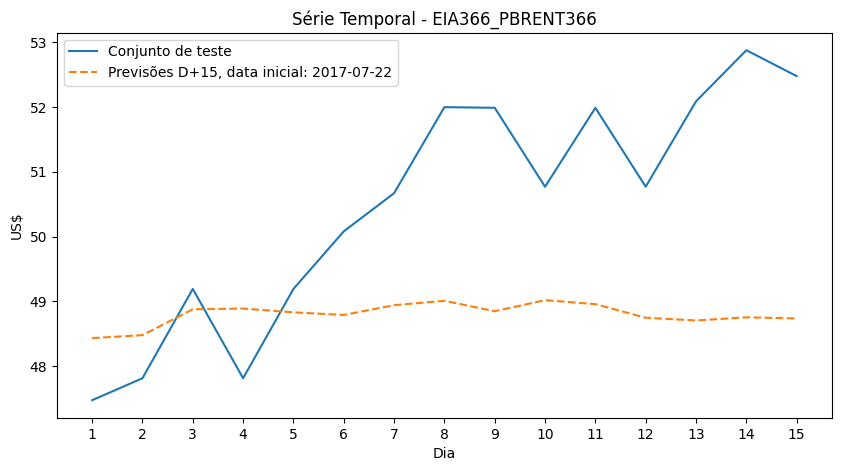

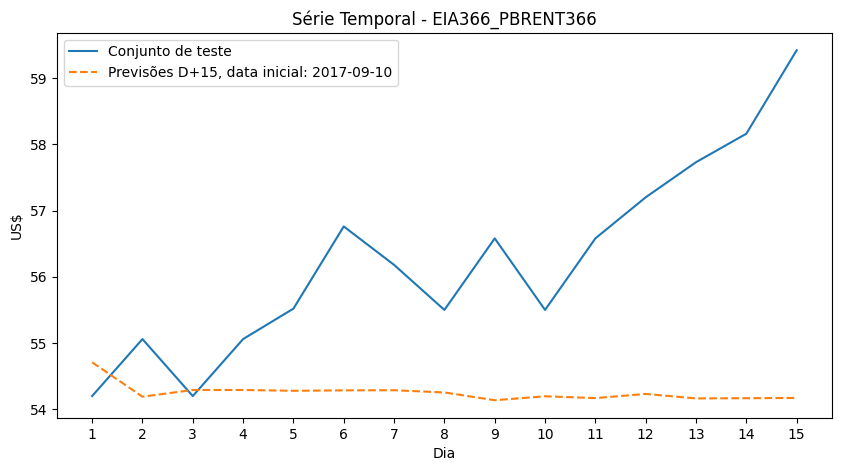

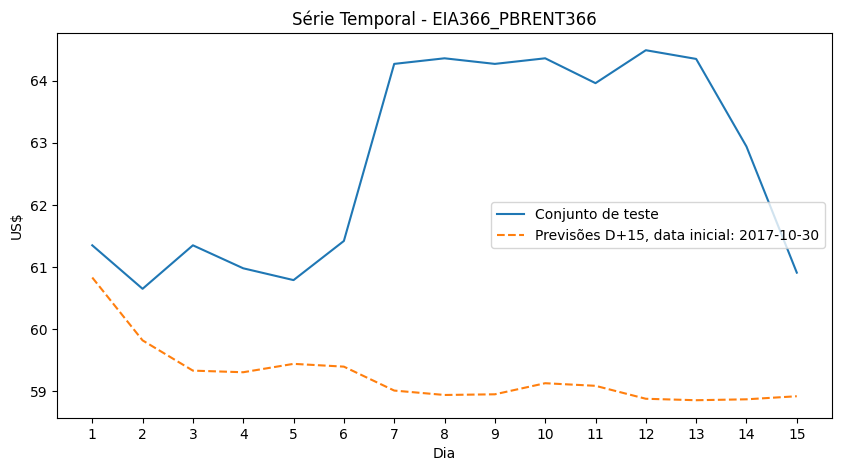

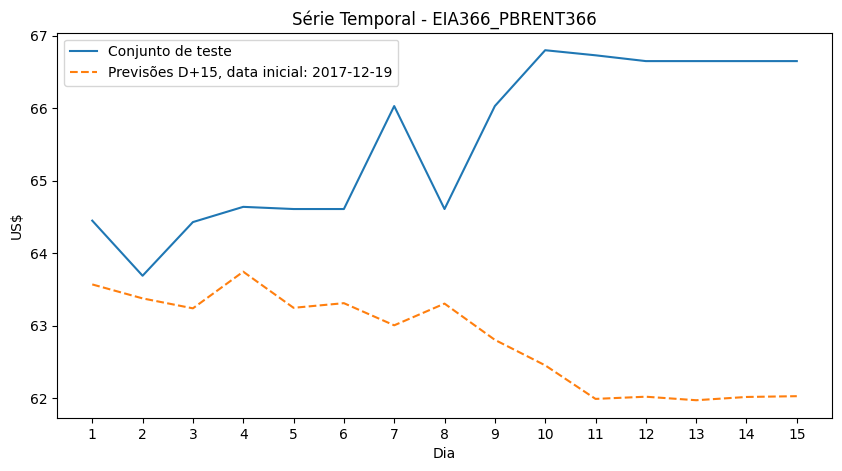

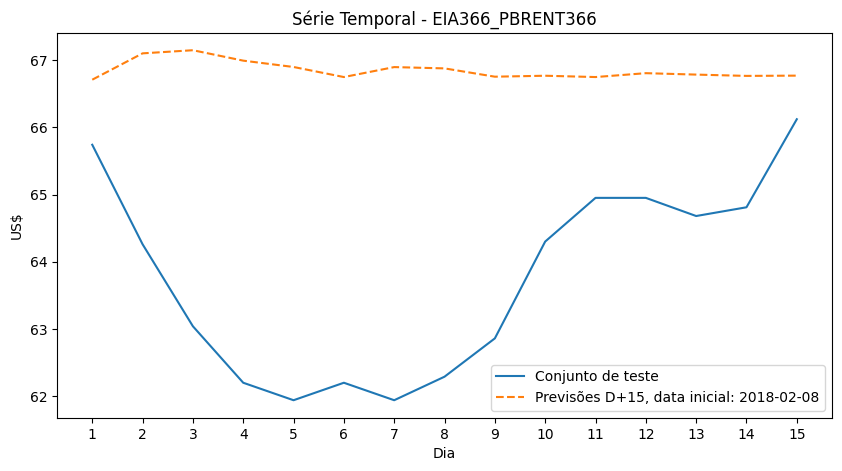

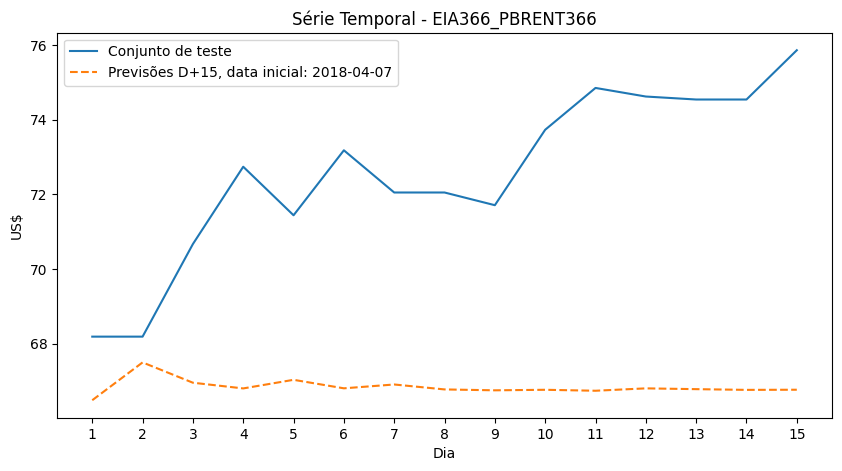

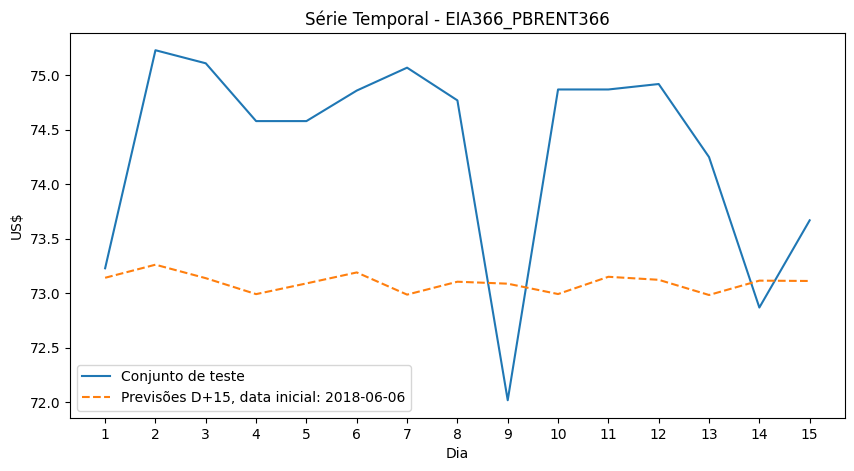

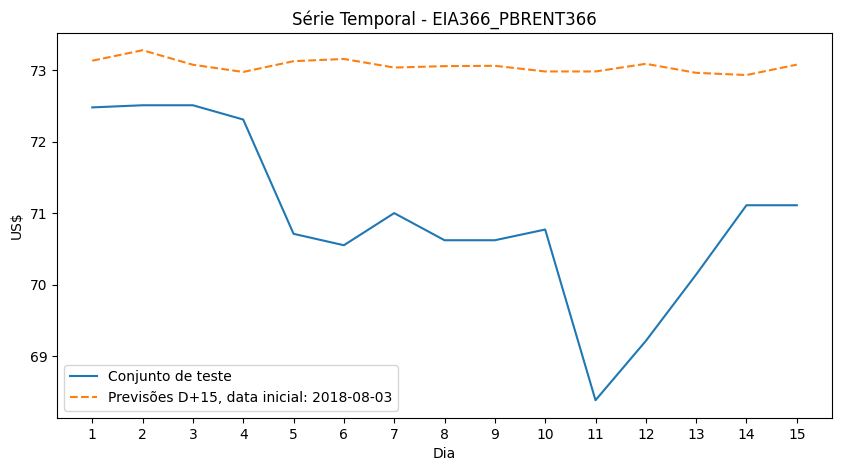

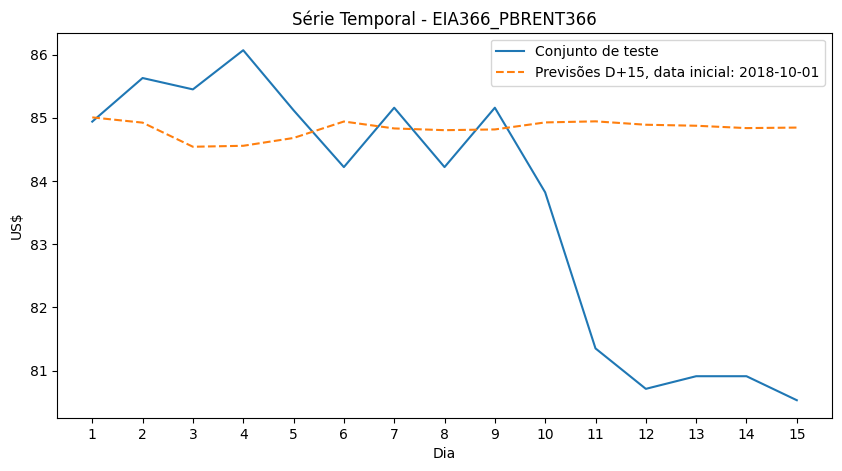

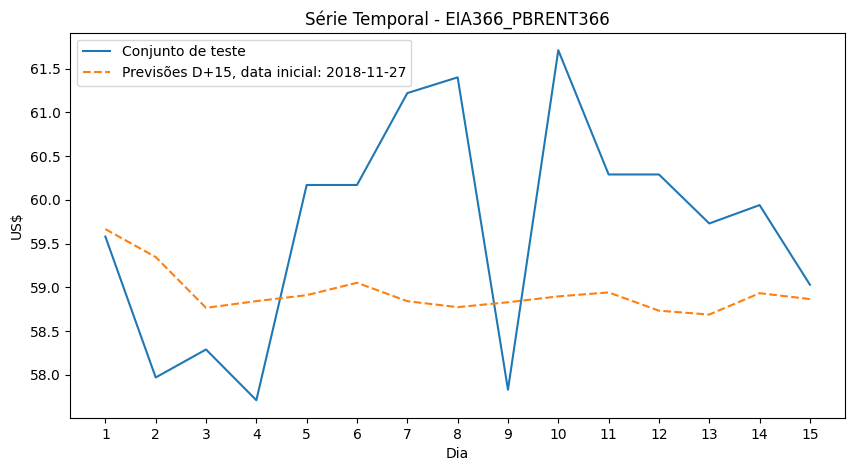

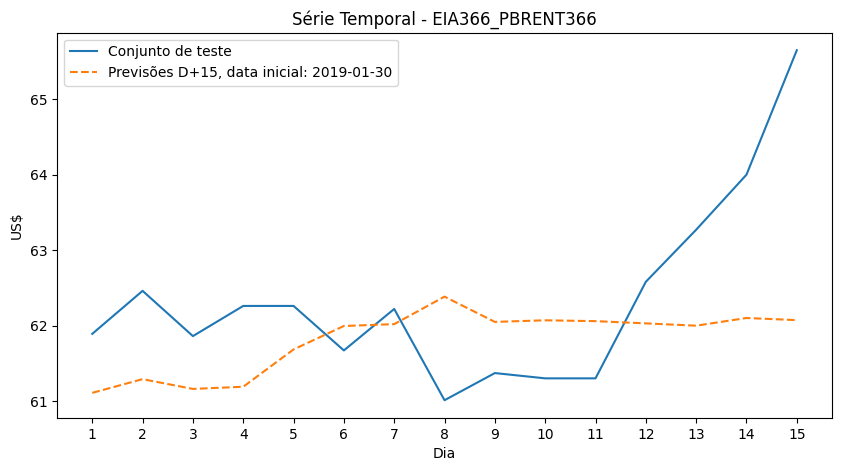

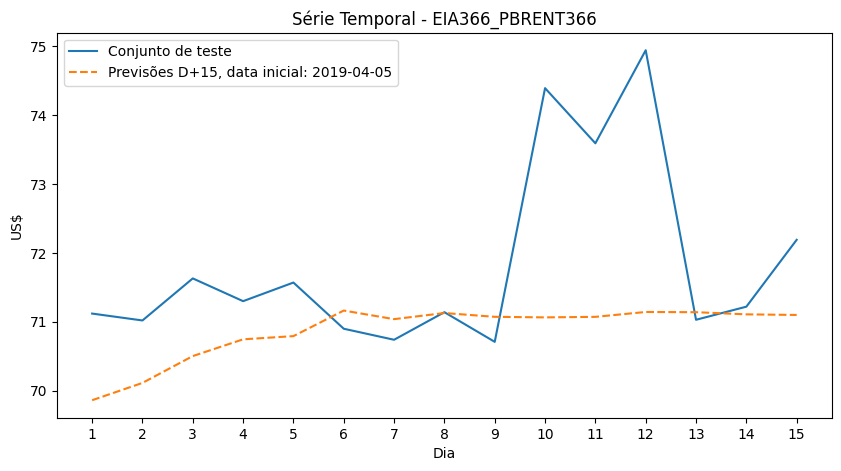

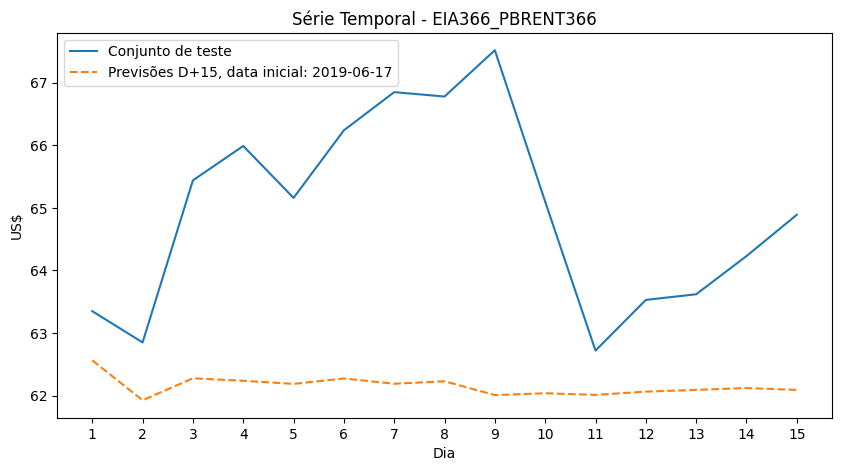

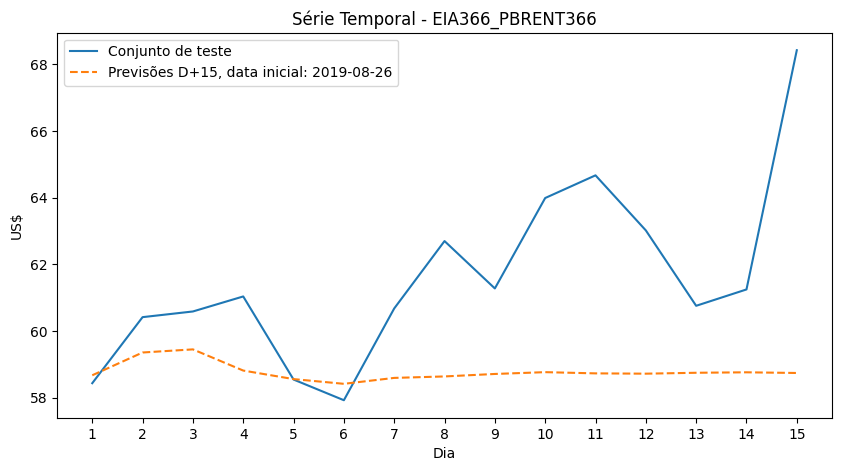

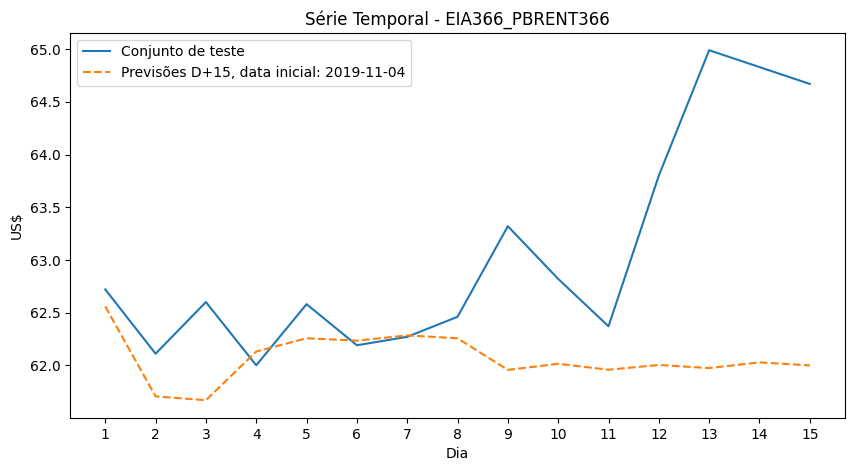

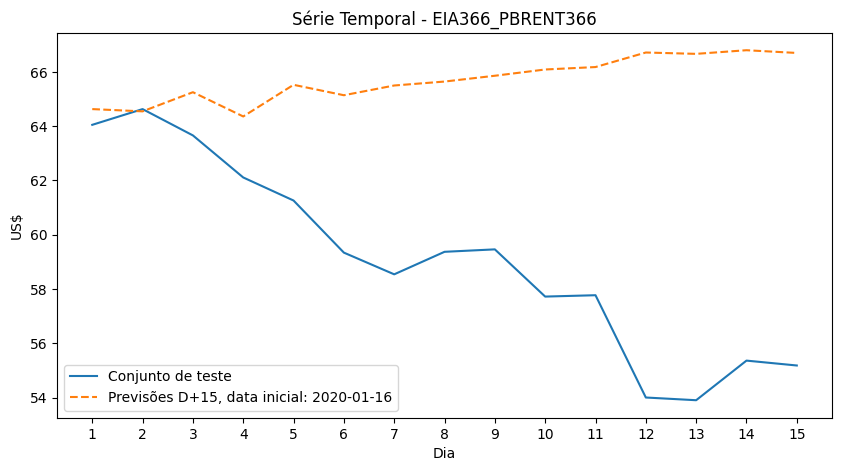

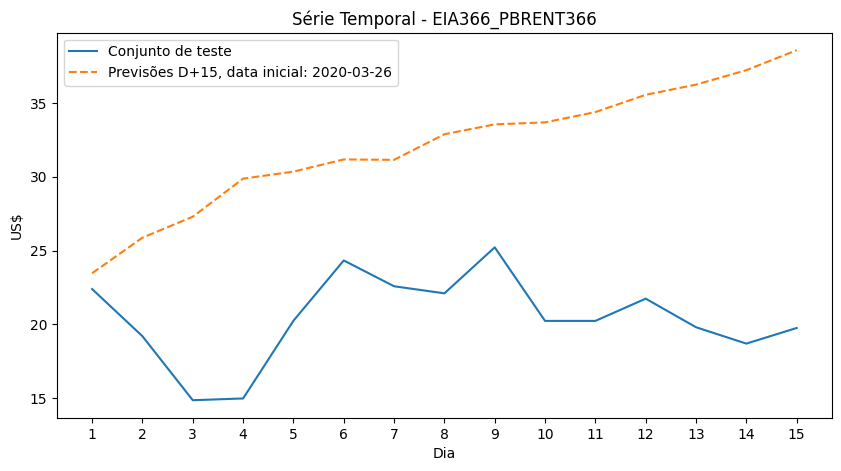

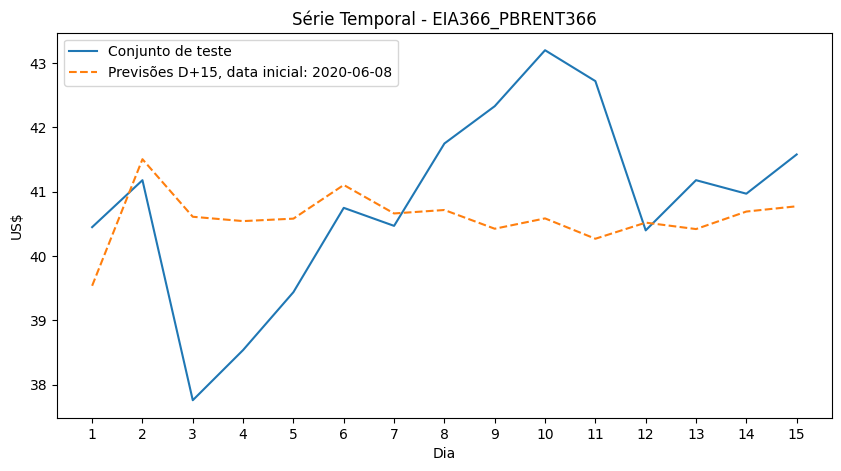

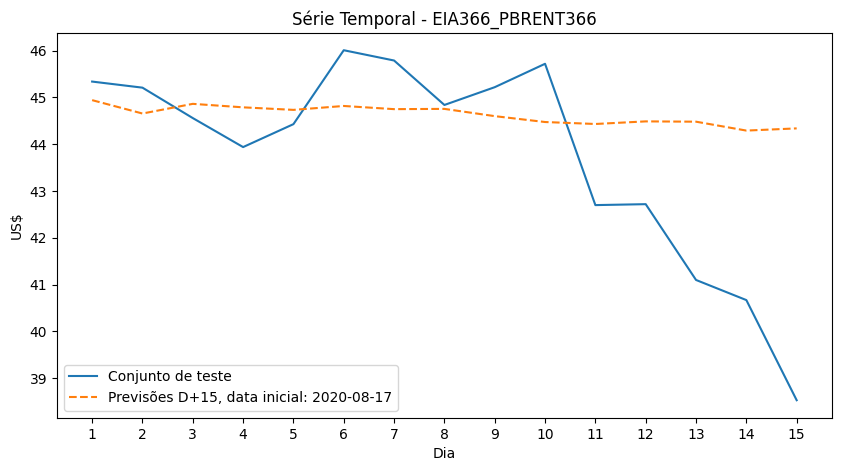

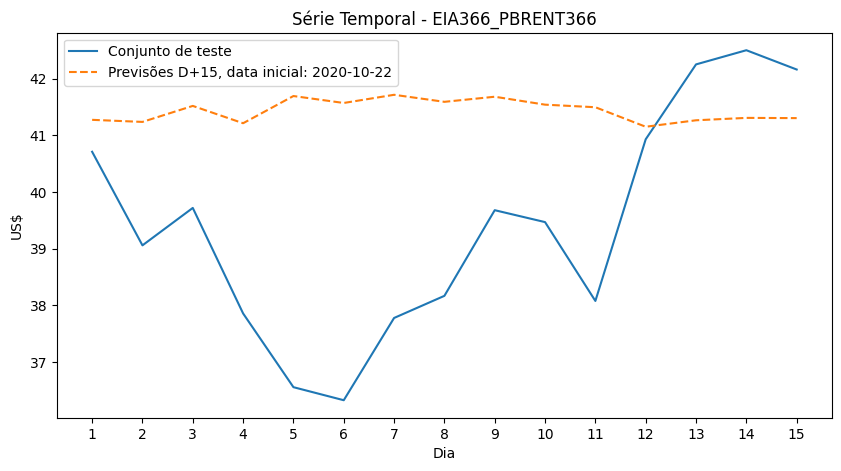

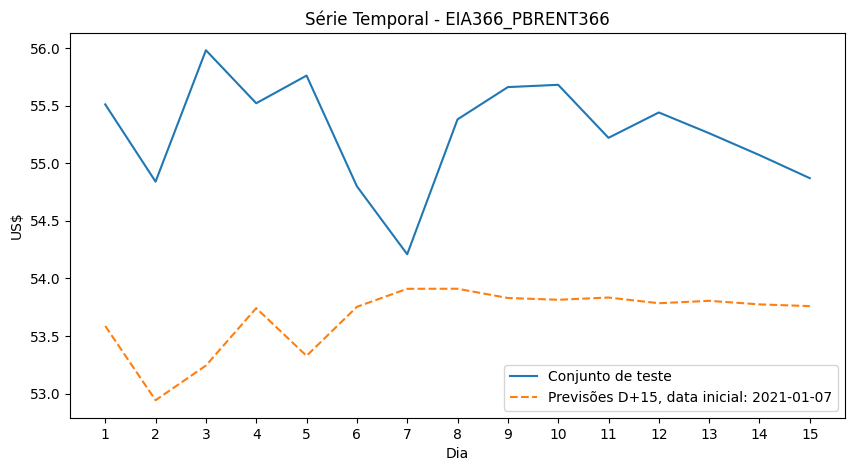

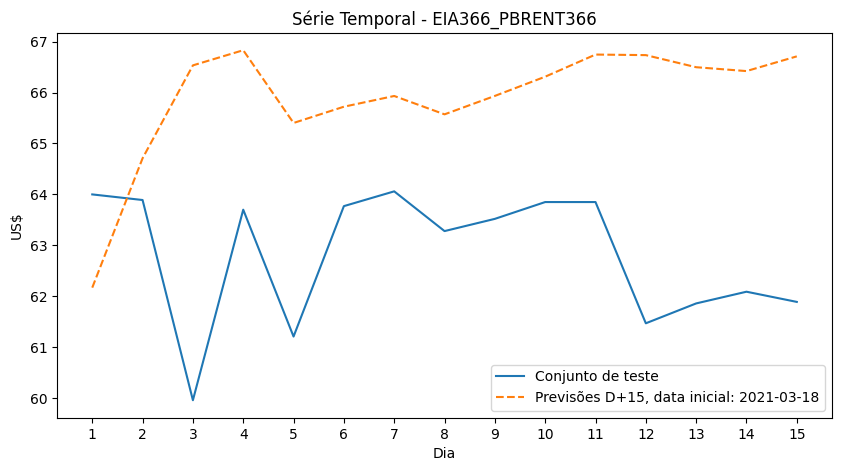

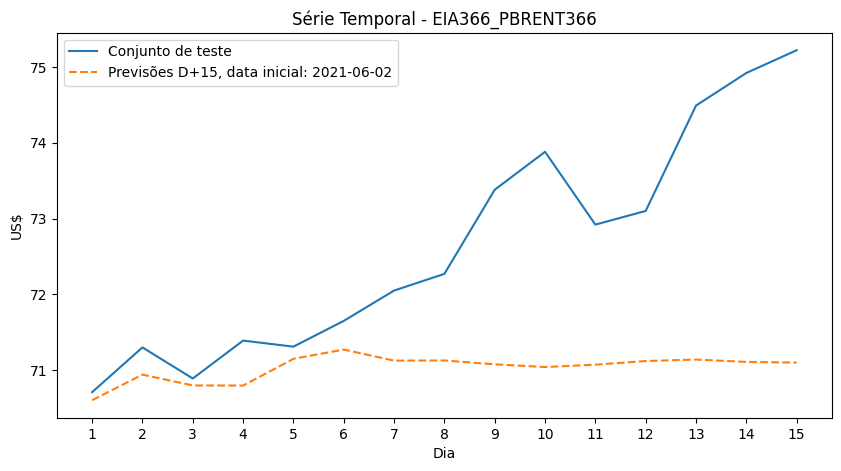

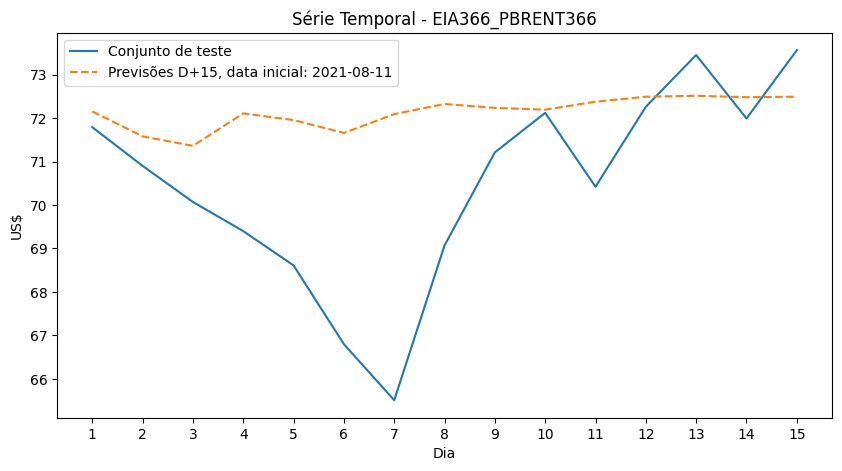

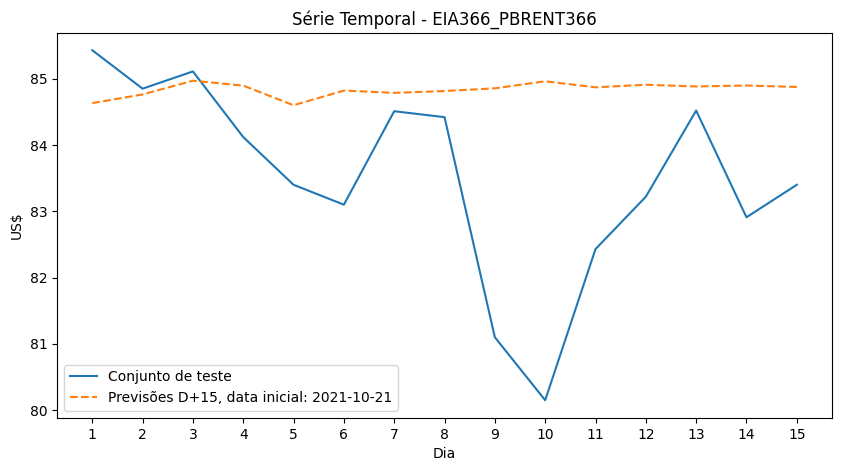

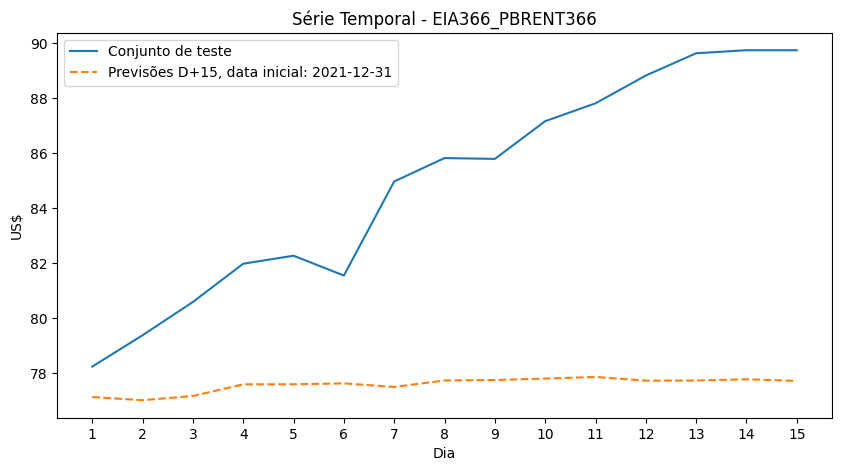

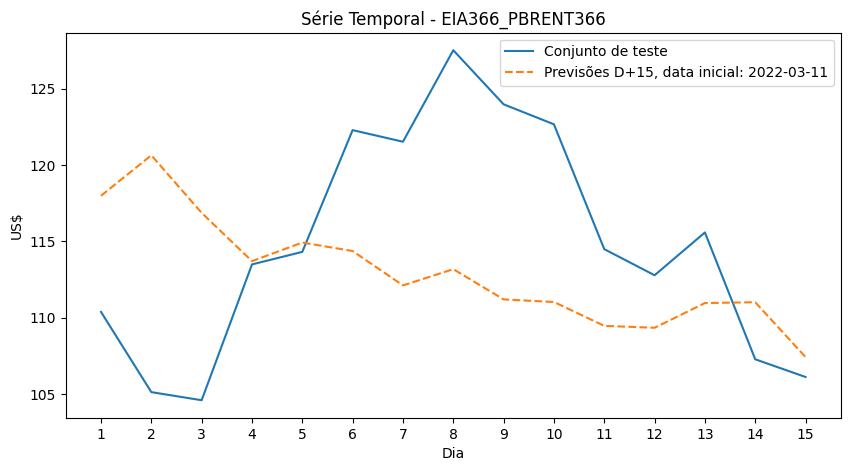

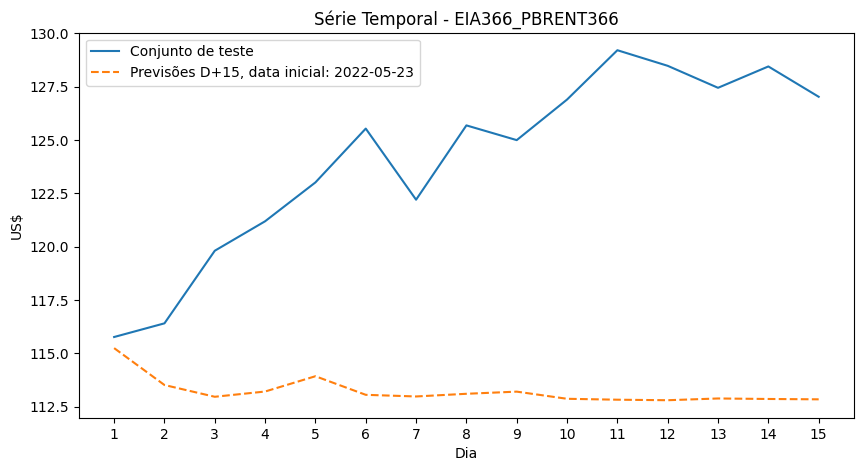

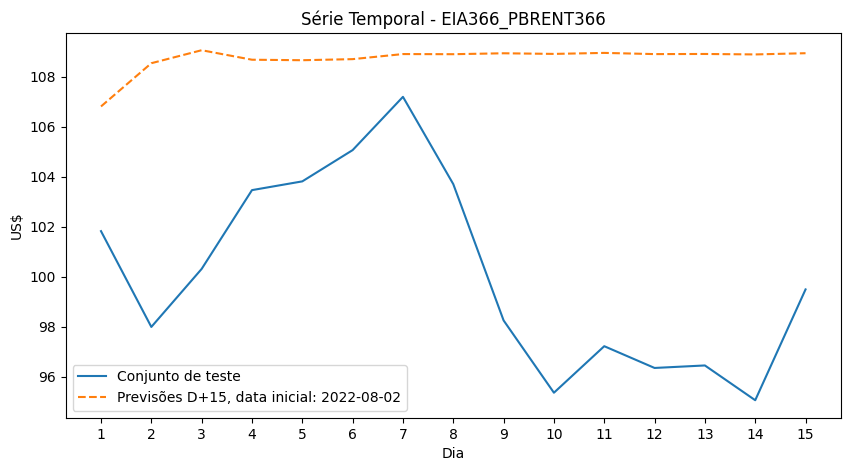

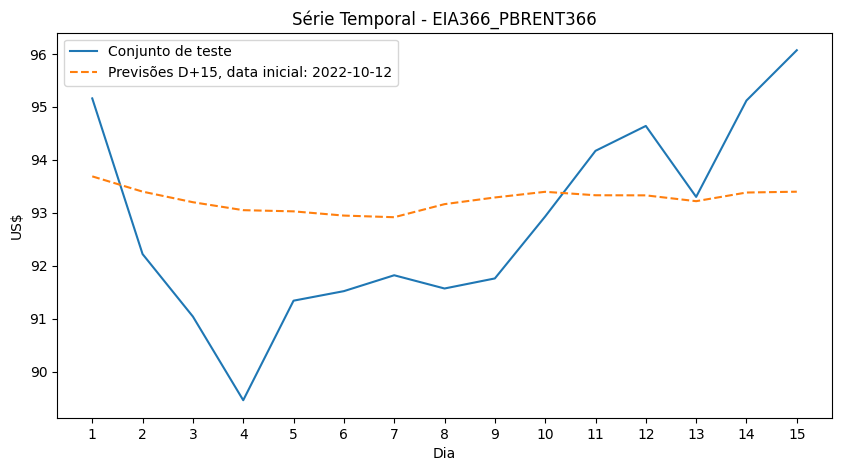

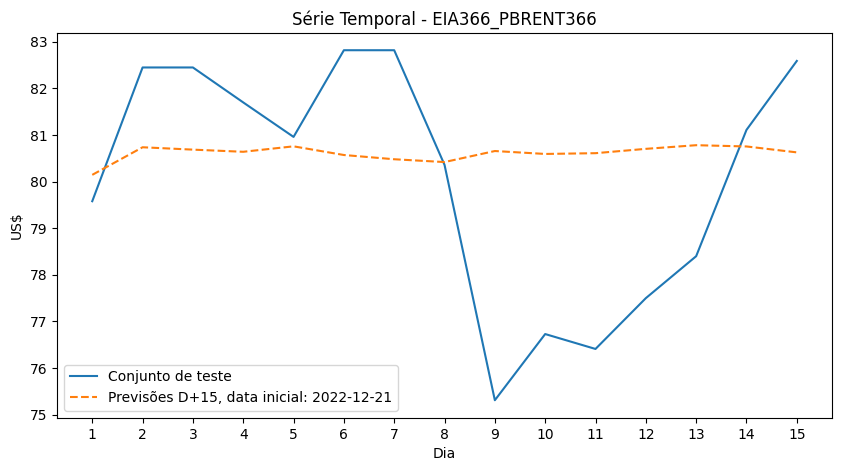

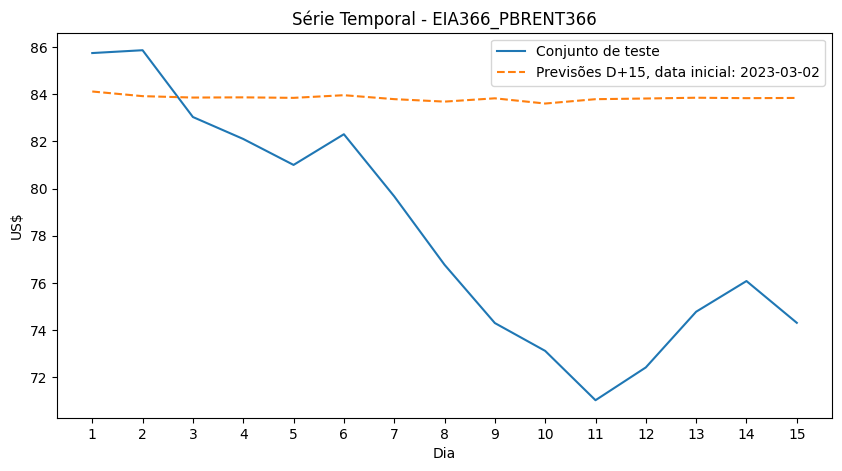

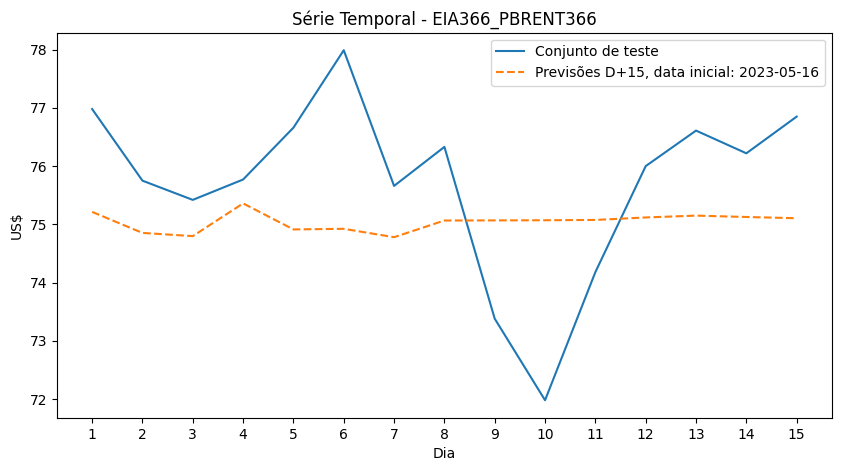

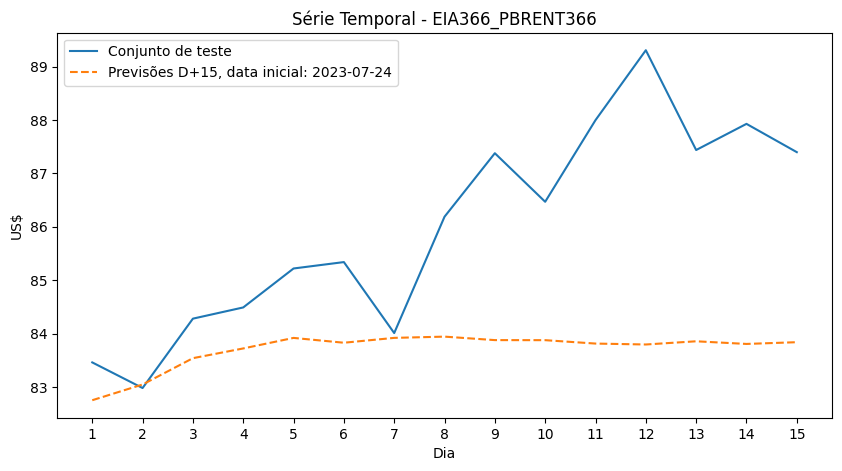

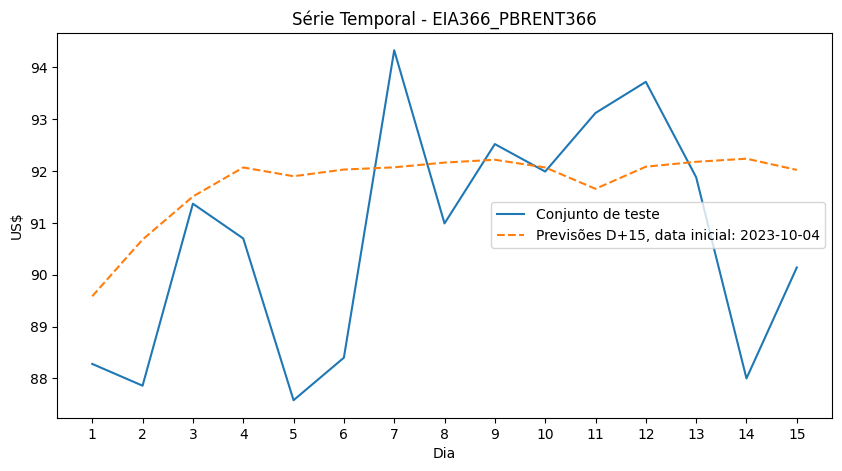

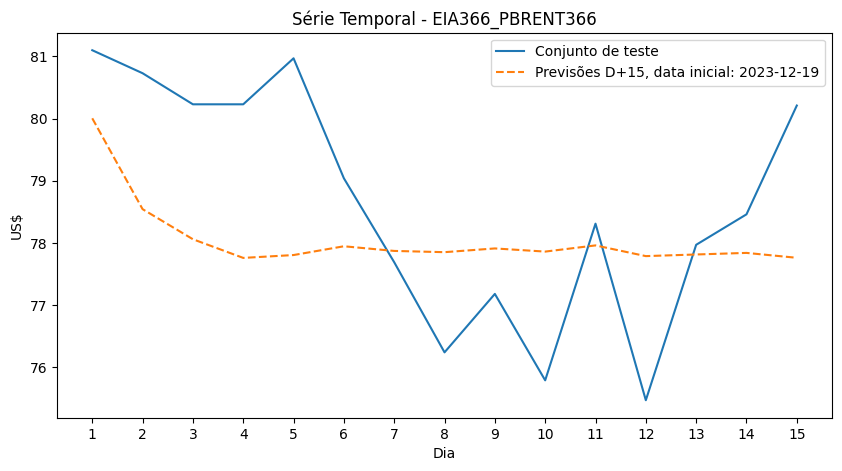

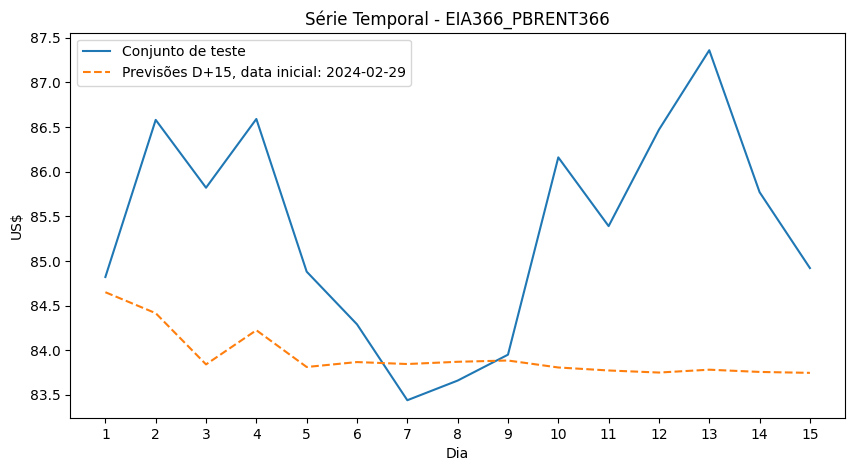

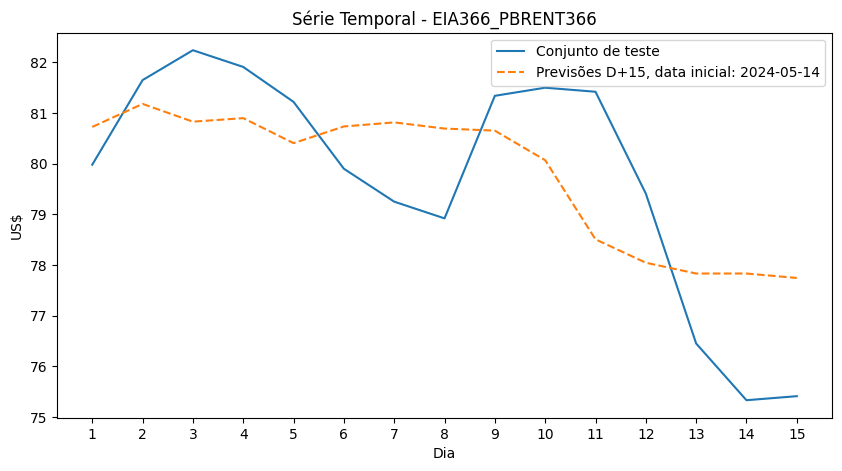

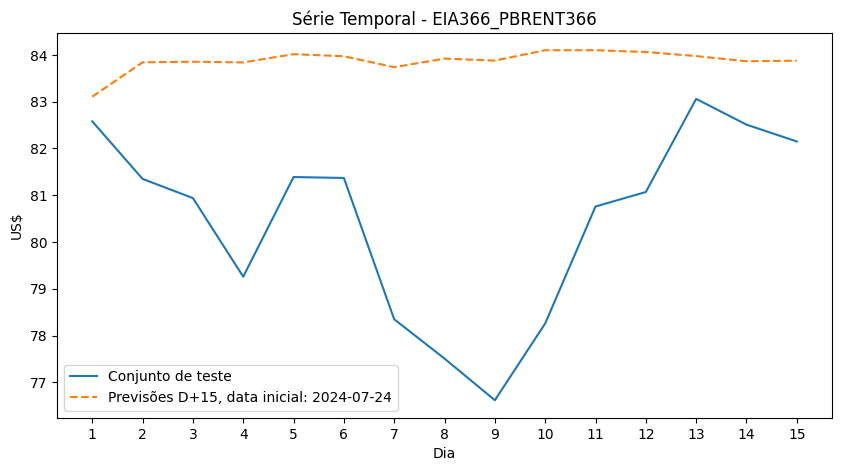

In [35]:
import matplotlib.pyplot as plt

dates = y_test.index

for i in range(0, len(dates), 50):
    plt.figure(figsize=(10, 5))
    plt.title("Série Temporal - EIA366_PBRENT366")
    plt.plot(range(1, 16), y_test.iloc[i, :], label=f"Conjunto de teste")
    plt.plot(range(1, 16), y_pred[i, :], label=f"Previsões D+15, data inicial: {dates[i].strftime('%Y-%m-%d')}", linestyle="--")
    plt.xlabel("Dia")
    plt.ylabel("US$")
    plt.legend()
    plt.xticks(range(1, 16))
    plt.show()


# Fazendo previsões com dados não vistos

In [36]:
# dados para previsão
X_pred = eia366[-15:]
print(X_pred)

            value_usd
date                 
2024-08-05      77.51
2024-08-06      76.62
2024-08-07      78.26
2024-08-08      80.76
2024-08-09      81.07
2024-08-12      83.06
2024-08-13      82.51
2024-08-14      82.15
2024-08-15      83.09
2024-08-16      81.56
2024-08-19      81.09
2024-08-20      78.85
2024-08-21      78.77
2024-08-22      78.80
2024-08-23      80.34


In [37]:
# engenharia de features
feature_engineer = search.best_estimator_.named_steps["feature_engineering"]
X_pred_transformed = feature_engineer.transform(X_pred)[-1:]
X_pred_transformed

lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7  lag_8  lag_9  \
date                                                                        
2024-08-23  80.34   78.8  78.77  78.85  81.09  81.56  83.09  82.15  82.51   

            lag_10  ...  lag_14  lag_15  rolling_mean_15  diff  month  \
date                ...                                                 
2024-08-23   83.06  ...   76.62   77.51           80.296  1.54      8   

            day_of_week  rolling_std_15  day  quarter  year  
date                                                         
2024-08-23            4         2.05126   23        3  2024  

[1 rows x 23 columns]

In [38]:
# normalização
scaler = search.best_estimator_.named_steps["scaler"]
scaled_data = scaler.transform(X_pred_transformed)
scaled_data

array([[1.00844865, 0.96386941, 0.96348048, 0.9663154 , 1.03238443,
        1.0466078 , 1.09186884, 1.06482488, 1.07581673, 1.09237828,
        1.03451323, 1.02586763, 0.95304423, 0.90543793, 0.93193626,
        1.01152219, 1.09989648, 0.43453562, 0.81699897, 0.73767263,
        0.83269614, 0.44560964, 3.02734552]])

In [39]:
# previsão
model = search.best_estimator_.named_steps["model"]
predictions = model.predict(scaled_data)
predictions

array([[80.72098283, 80.60104001, 80.59134457, 80.61329576, 80.505548  ,
        80.47206571, 80.58202092, 80.59576258, 80.65709453, 80.59105632,
        80.61072406, 80.68715802, 80.70521852, 80.66741877, 80.6281488 ]])

In [40]:
preds_df = pd.DataFrame(predictions.T)
preds_df.columns = ["Preço (US$)"]
preds_df

Preço (US$)
0     80.720983
1     80.601040
2     80.591345
3     80.613296
4     80.505548
5     80.472066
6     80.582021
7     80.595763
8     80.657095
9     80.591056
10    80.610724
11    80.687158
12    80.705219
13    80.667419
14    80.628149